**Importing Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use("dark_background")

In [2]:
import os
os.listdir('./dataset')

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']

**Loading Images**

In [3]:
from PIL import Image

def load_images(path):
    imgs = list()
    label = list()
    
    for folder in os.listdir(path):
        if folder not in ['alien_test', 'test.csv']:
            subpath = path + '/' + folder
            for image in os.listdir(subpath):
                img = Image.open(subpath + '/' + image).convert('RGB')
                img = img.resize(size=(32, 32))
                imgs.append(np.array(img))
                label.append(folder)
                del img
    
    plt.figure(figsize = (5, 5))
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.imshow(imgs[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imgs), label

# Dataset Pre-Processing

**Fetching Images & Applying Normalization on Images**

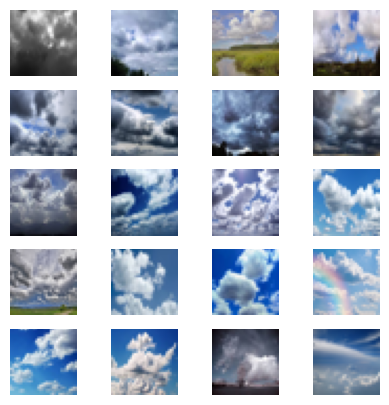

((1500, 32, 32, 3), 1500)

In [4]:
x, y = load_images('./dataset')
x = x/255.0
x.shape, len(y)

**Reshaping all the images**

In [5]:
nsamples, nx, ny, nrgb = x.shape
x_new = x.reshape((nsamples, nx * ny * nrgb))
x_new.shape

(1500, 3072)

**Applying Label Encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y)
x_new.shape, y_new.shape

((1500, 3072), (1500,))

**Split Dataset into training & testing data**

In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_new, y_new, test_size=0.01, random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1485, 3072), (15, 3072), (1485,), (15,))

**plot sample data**

[]

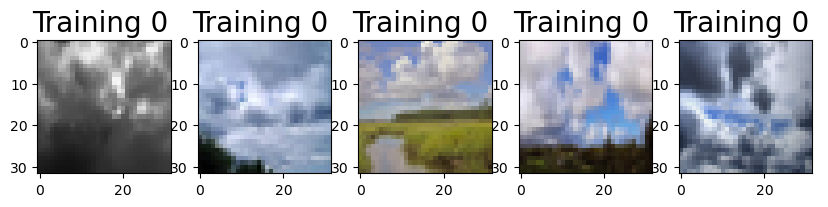

In [8]:
plt.figure(figsize = (10, 10))
for index, (image, label) in enumerate(zip(x_new[:5], y_new[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (32, 32, 3)))
    plt.title('Training %d ' % label, fontsize=20)
plt.plot()

# Plotting function

In [9]:
# Confusion Matrix
def plotConfusionMatrix(actual, predict, model):
    from sklearn.metrics import confusion_matrix
    
    labels = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
    
    confusion_matrix = confusion_matrix(actual, predict)
    matrix_df = pd.DataFrame(confusion_matrix)  #plot the result
    
    ax = plt.axes()
    sns.set(font_scale=1)
    plt.figure(figsize=(15, 15))
    sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Oranges") # set axis titles

    ax.set_title(f'Confusion Matrix - {model}\n', fontsize=15)
    ax.set_xlabel('\nPredicted label', fontsize=15)
    ax.set_ylabel('True Label\n', fontsize=15)
    ax.set_yticklabels(list(labels), rotation=0)
    plt.show()

In [10]:
# Plot Prediction
def plotPrediction(x, y, prediction):
    plt.figure(figsize=(15, 15))
    for index, (image, actual, pred) in enumerate(zip(x, y, prediction)):
        plt.subplot(3, 5, index+1)
        plt.imshow(np.reshape(image, (32, 32, 3)))
        plt.title(f'{actual} -> {pred} ', fontsize=15)
    plt.show()

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

**solver = "newton-cg"**

In [12]:
lgr_newton = LogisticRegression(solver="newton-cg")
lgr_newton.fit(train_x, train_y)
print("Actual  -", test_y)
print("Predict -", lgr_newton.predict(test_x))
print("Accuracy-", lgr_newton.score(test_x, test_y))

Actual  - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predict - [3 4 1 1 1 0 3 1 4 0 0 4 0 4 0]
Accuracy- 0.7333333333333333


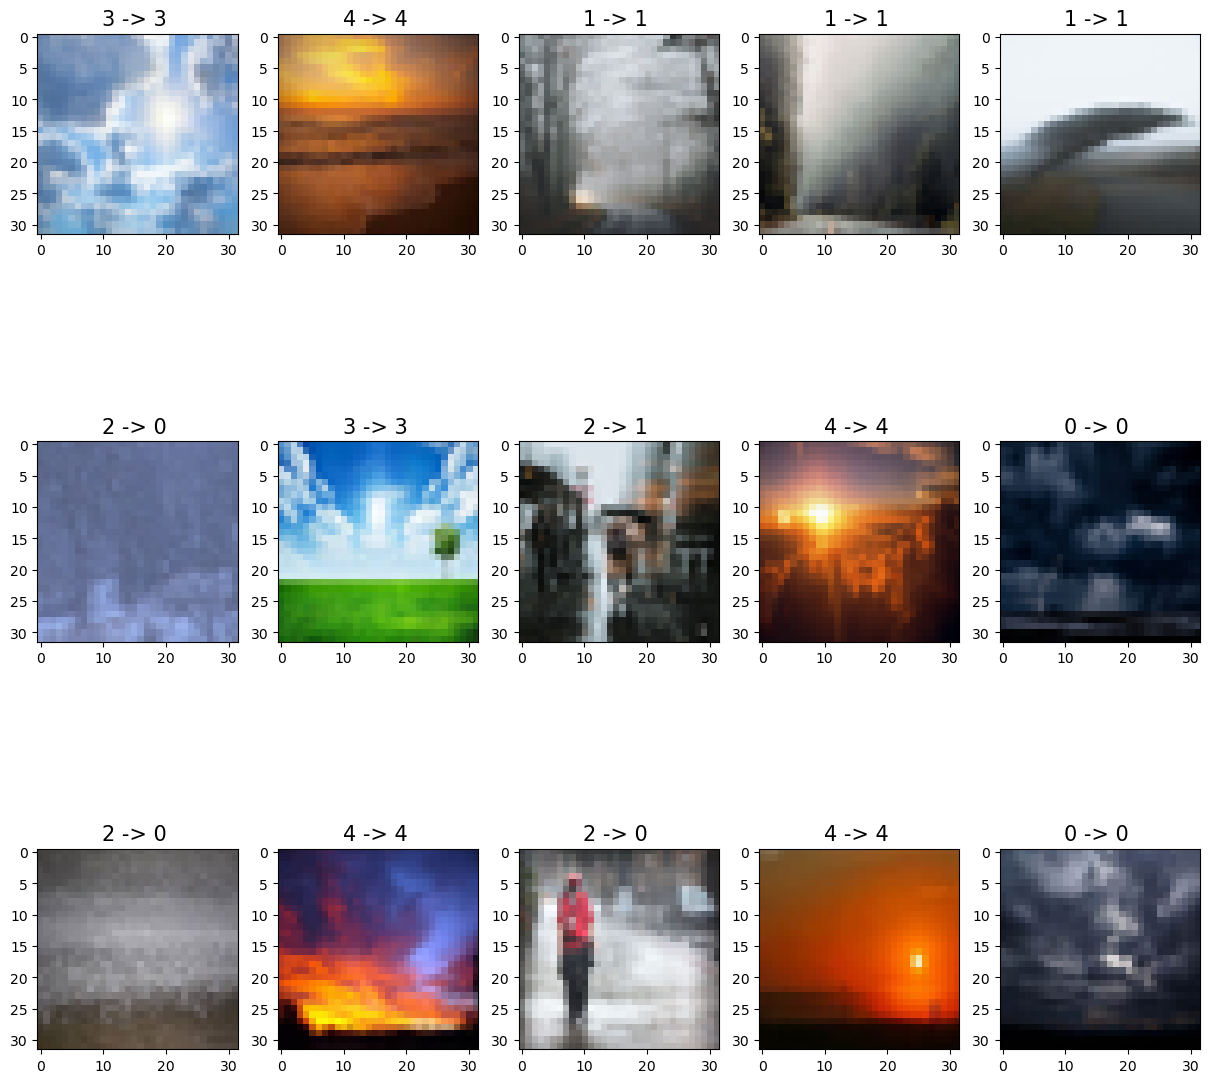

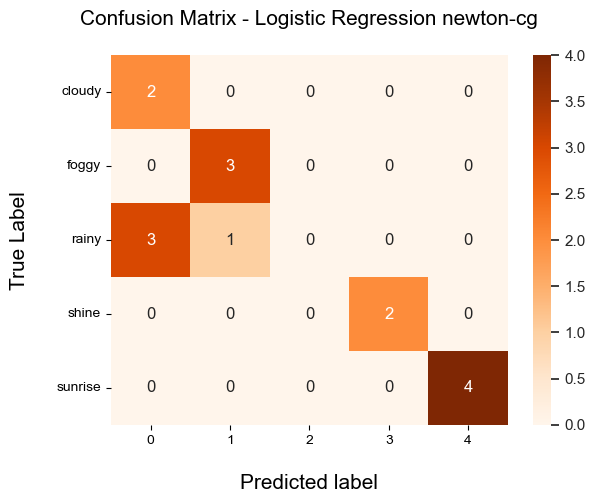

<Figure size 1500x1500 with 0 Axes>

In [13]:
plotPrediction(test_x, test_y, lgr_newton.predict(test_x))
plotConfusionMatrix(test_y, lgr_newton.predict(test_x), 'Logistic Regression newton-cg')

**solver = "lbfgs"**

In [14]:
lgr_lbfgs = LogisticRegression(solver="lbfgs")
lgr_lbfgs.fit(train_x, train_y)
print("Actual  -", test_y)
print("Predict -", lgr_lbfgs.predict(test_x))
print("Accuracy-", lgr_lbfgs.score(test_x, test_y))

Actual  - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predict - [3 4 2 1 1 2 3 1 4 0 0 4 2 4 0]
Accuracy- 0.8


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


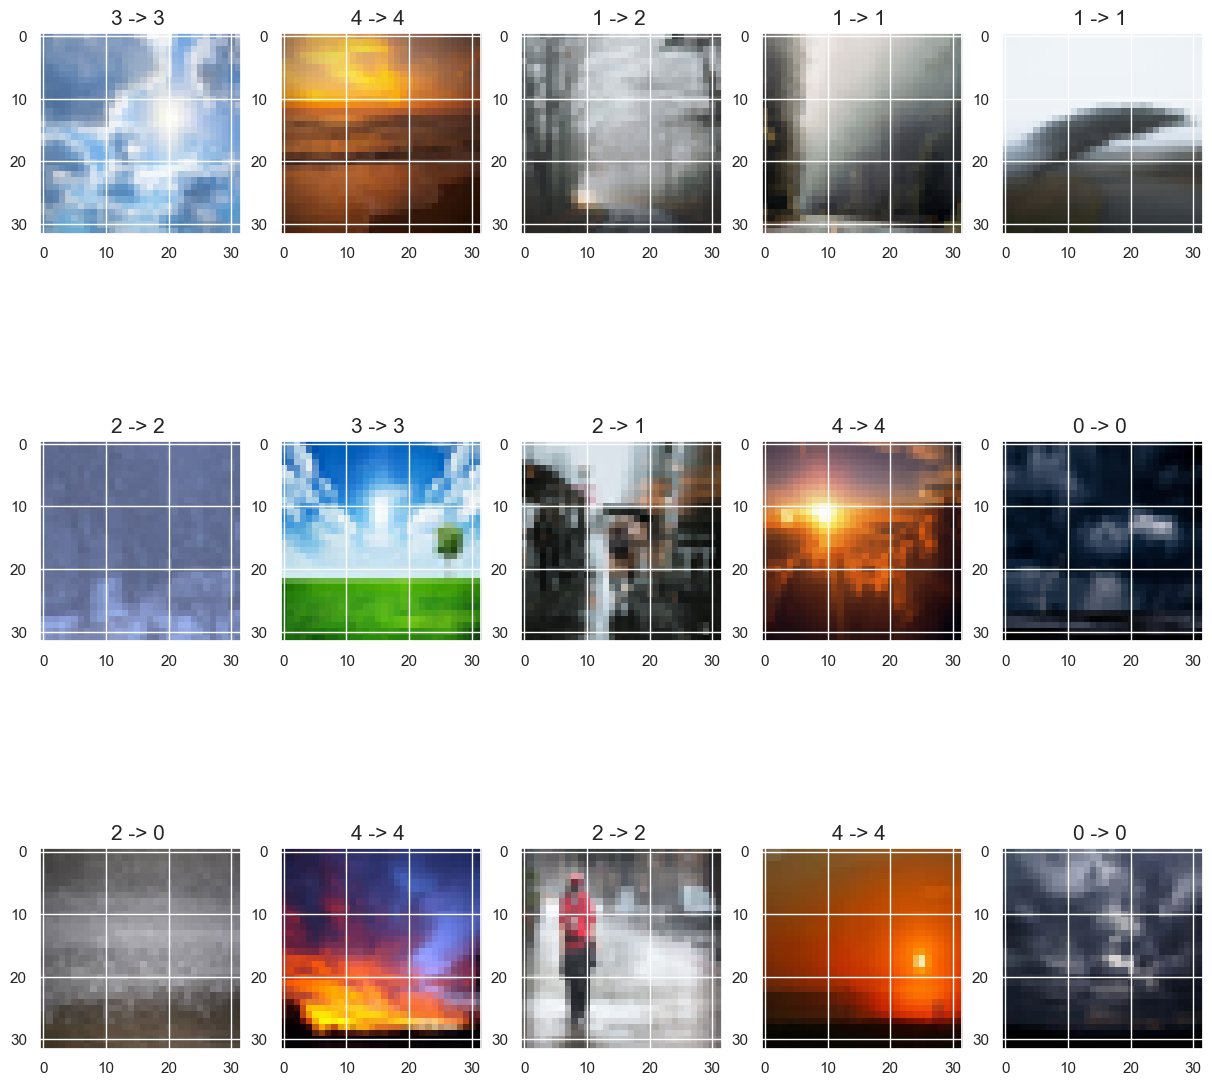

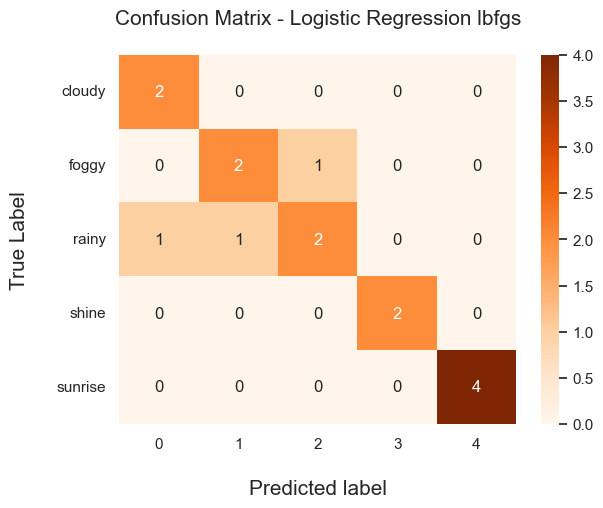

<Figure size 1500x1500 with 0 Axes>

In [15]:
plotPrediction(test_x, test_y, lgr_lbfgs.predict(test_x))
plotConfusionMatrix(test_y, lgr_lbfgs.predict(test_x), 'Logistic Regression lbfgs')

**solver = "liblinear"**

In [16]:
lgr_liblinear = LogisticRegression(solver="liblinear")
lgr_liblinear.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_liblinear.predict(test_x))
print("Accuracy -", lgr_liblinear.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 2 1 1 2 3 1 4 0 0 4 0 4 0]
Accuracy - 0.7333333333333333


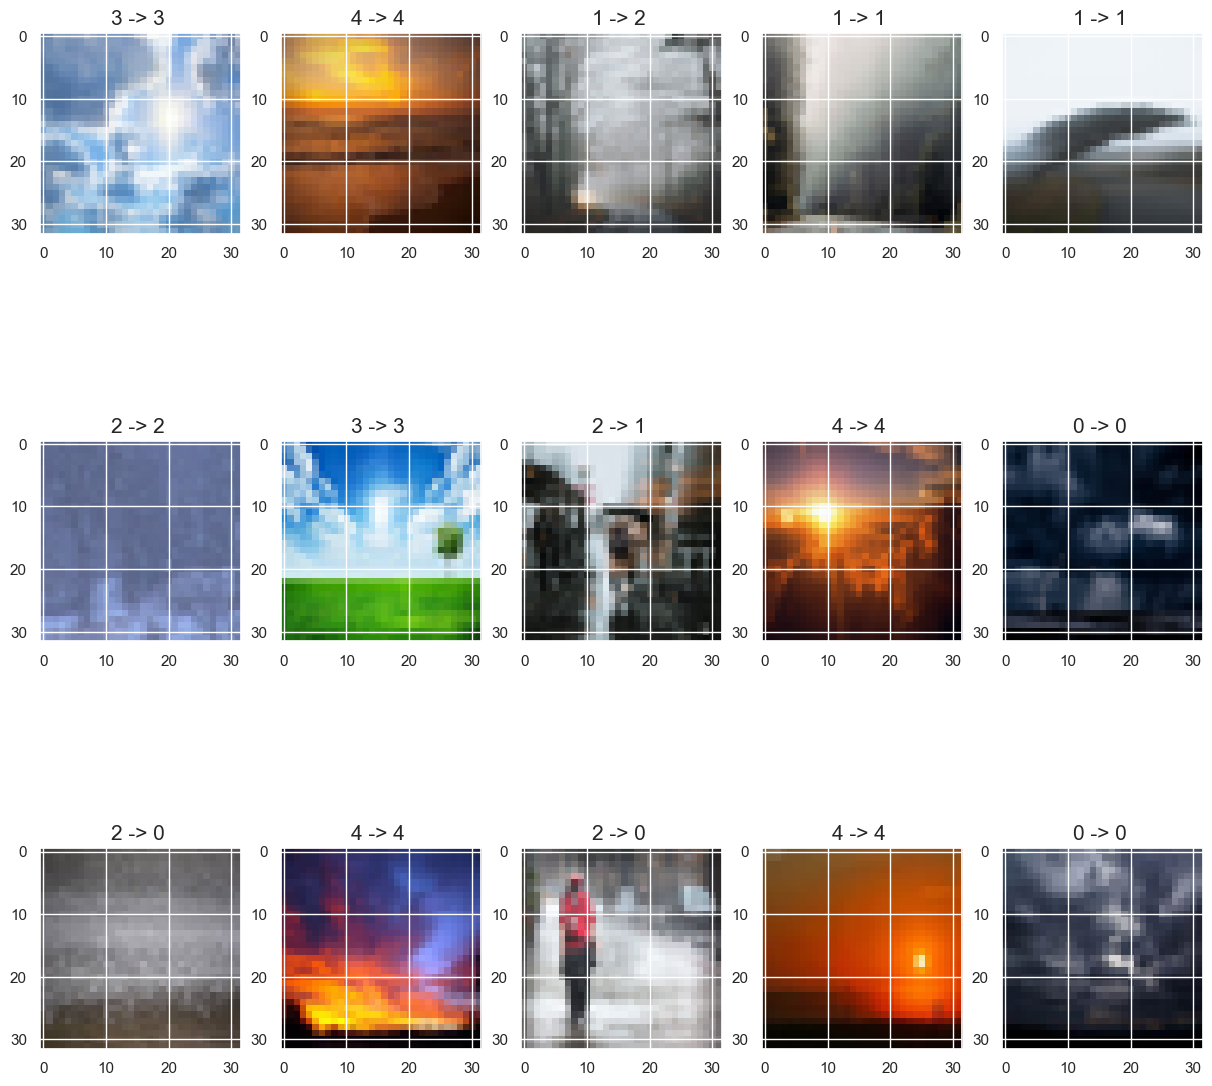

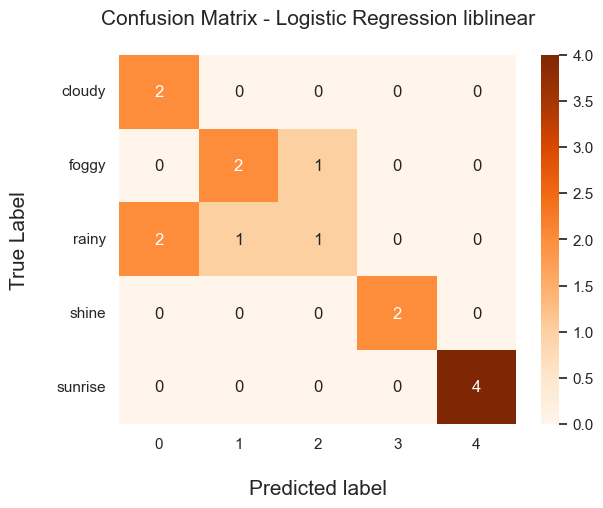

<Figure size 1500x1500 with 0 Axes>

In [17]:
plotPrediction(test_x, test_y, lgr_liblinear.predict(test_x))
plotConfusionMatrix(test_y, lgr_liblinear.predict(test_x), 'Logistic Regression liblinear')

**solver = "sag"**

In [18]:
lgr_sag = LogisticRegression(solver="sag")
lgr_sag.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_sag.predict(test_x))
print("Accuracy -", lgr_sag.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 0 0 4 0 4 0]
Accuracy - 0.8


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


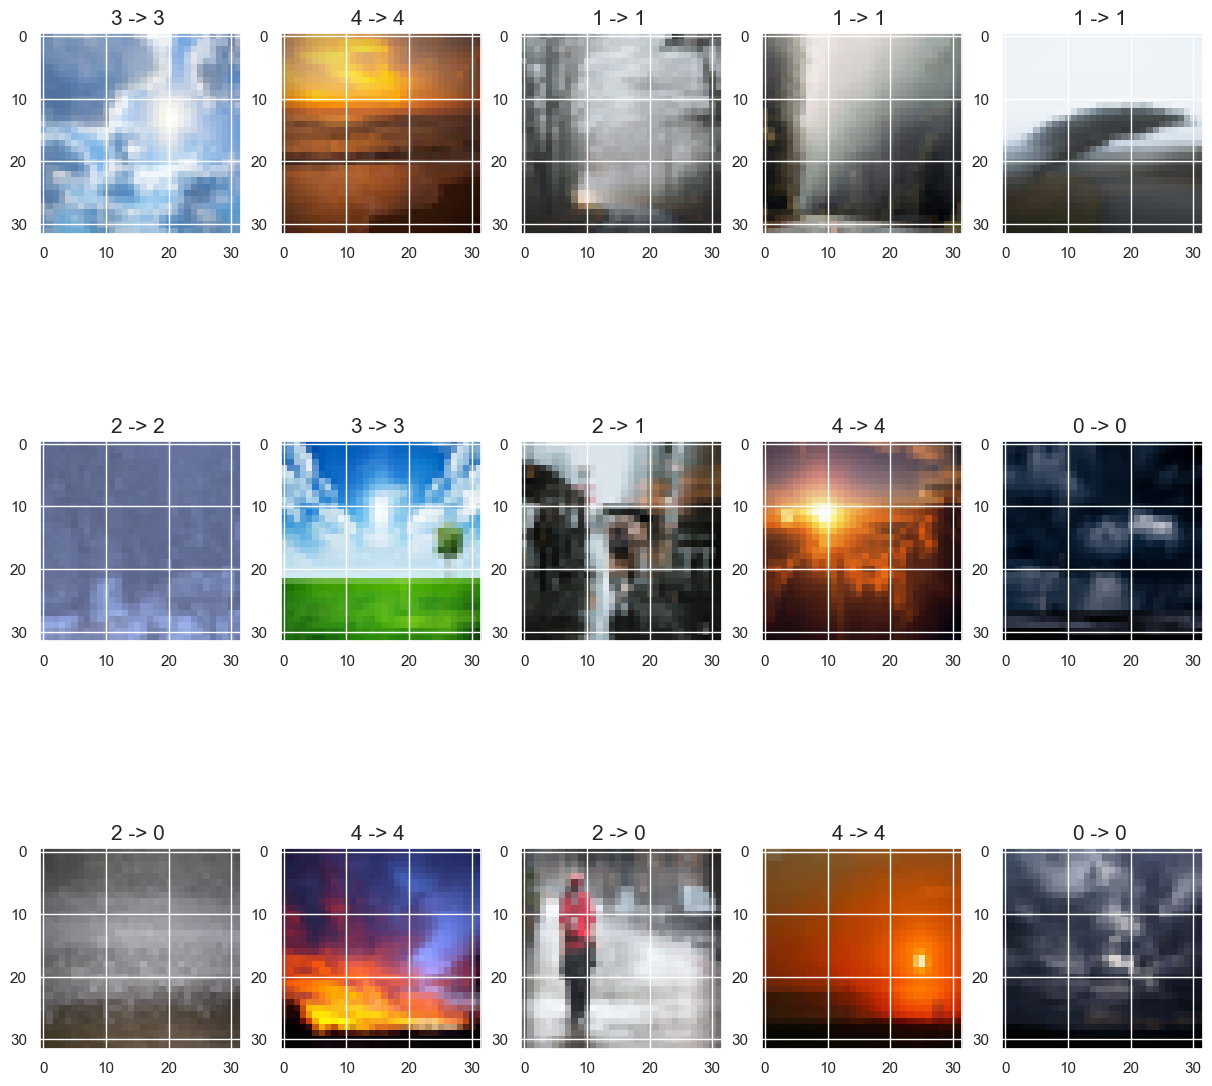

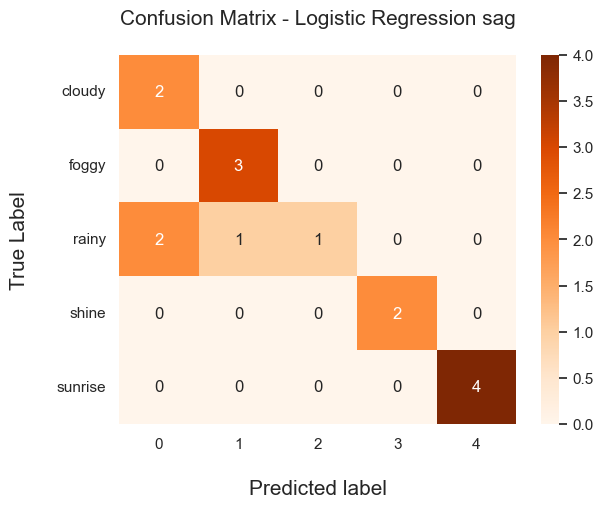

<Figure size 1500x1500 with 0 Axes>

In [19]:
plotPrediction(test_x, test_y, lgr_sag.predict(test_x))
plotConfusionMatrix(test_y, lgr_sag.predict(test_x), 'Logistic Regression sag')

**solver = "saga"**

In [20]:
lgr_saga = LogisticRegression(solver="saga")
lgr_saga.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", lgr_saga.predict(test_x))
print("Accuracy -", lgr_saga.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 0 0 4 2 4 0]
Accuracy - 0.8666666666666667


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


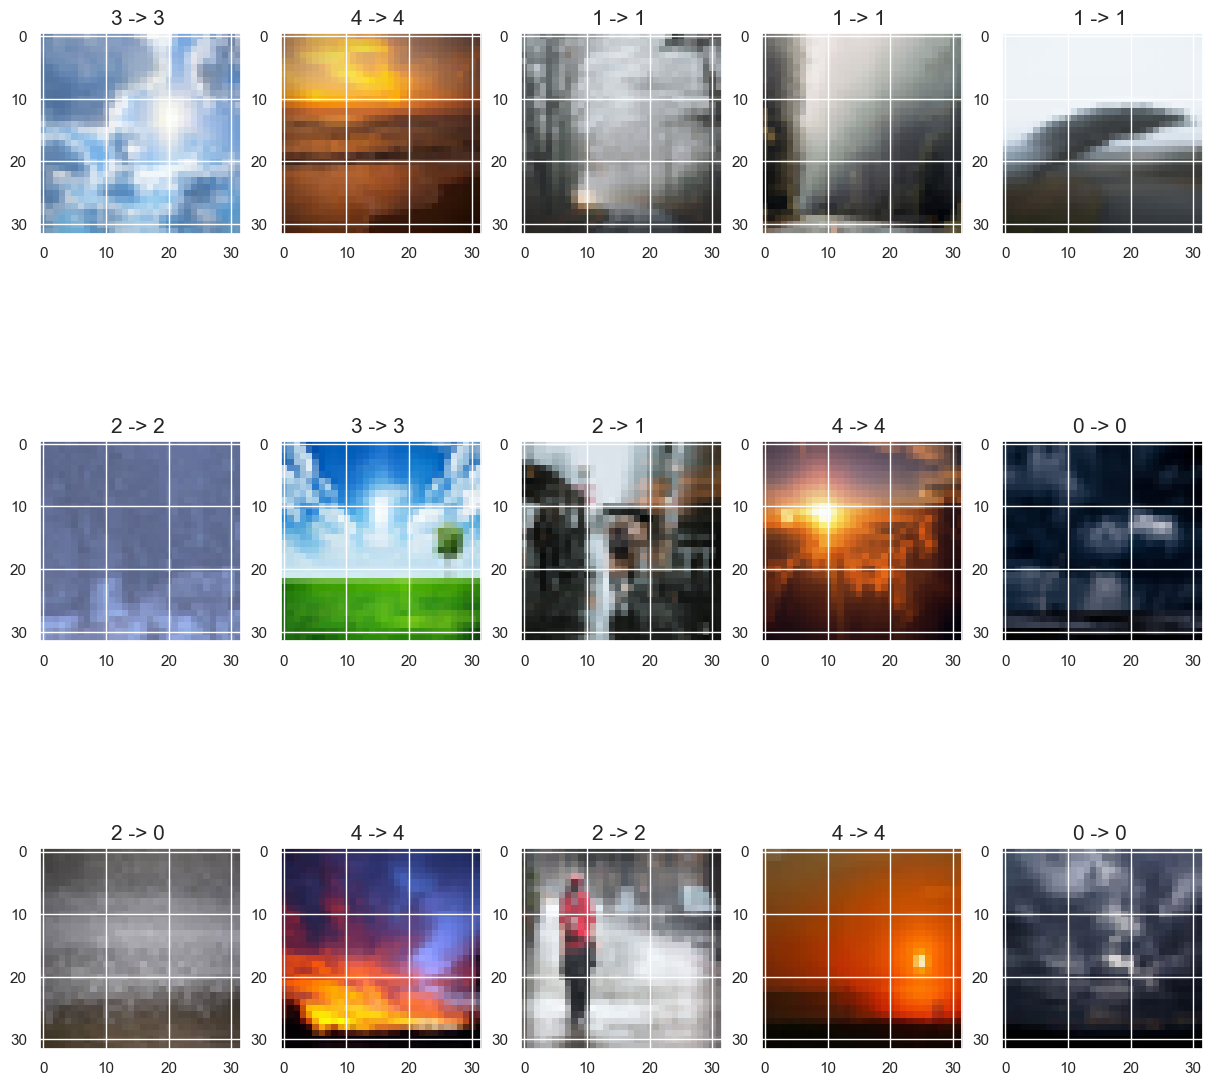

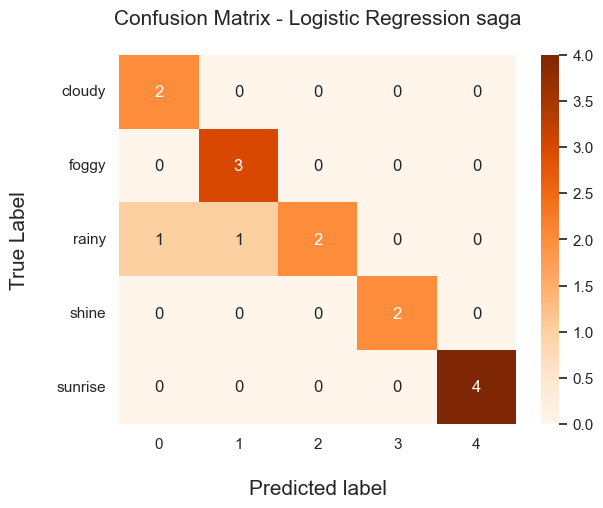

<Figure size 1500x1500 with 0 Axes>

In [21]:
plotPrediction(test_x, test_y, lgr_saga.predict(test_x))
plotConfusionMatrix(test_y, lgr_saga.predict(test_x), 'Logistic Regression saga')

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", dtc.predict(test_x))
print("Accuracy -", dtc.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [0 4 1 3 2 0 3 1 4 2 2 4 1 4 2]
Accuracy - 0.4666666666666667


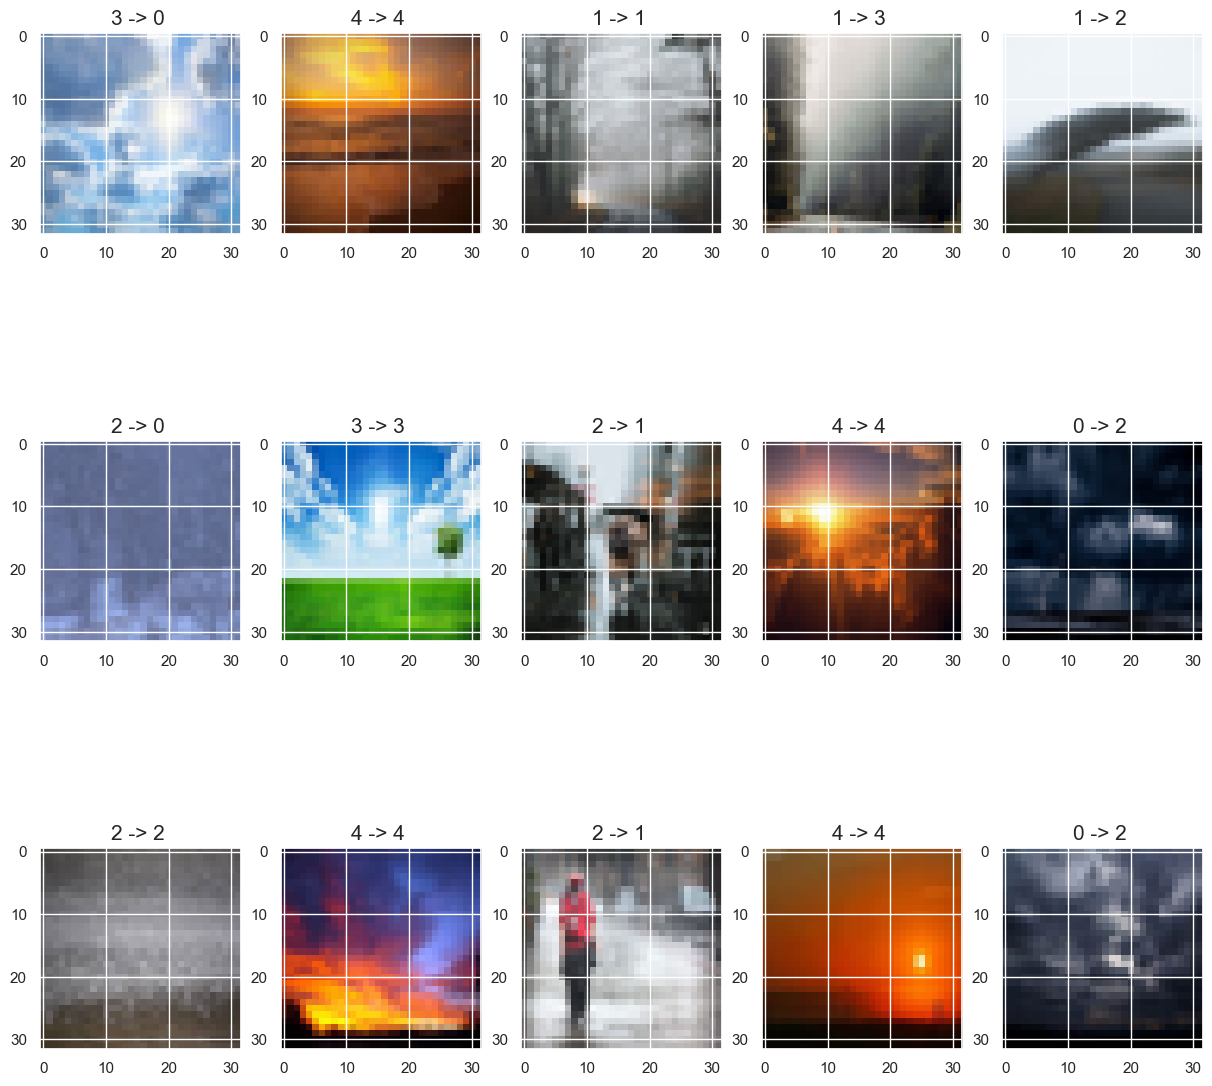

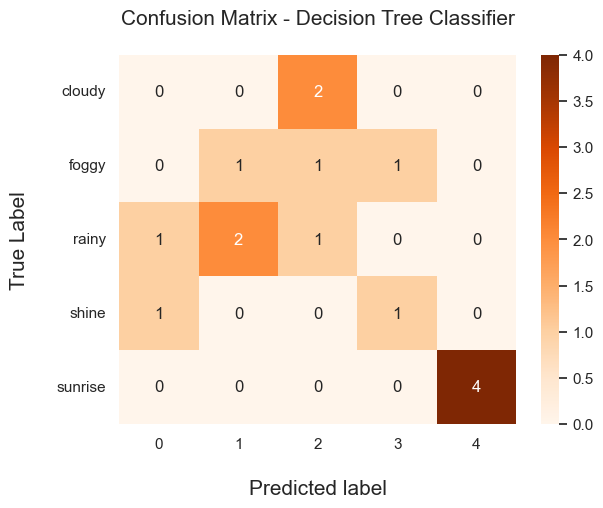

<Figure size 1500x1500 with 0 Axes>

In [24]:
plotPrediction(test_x, test_y, dtc.predict(test_x))
plotConfusionMatrix(test_y, dtc.predict(test_x), 'Decision Tree Classifier')

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", rfc.predict(test_x))
print("Accuracy -", rfc.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 2 4 2 4 0]
Accuracy - 0.8666666666666667


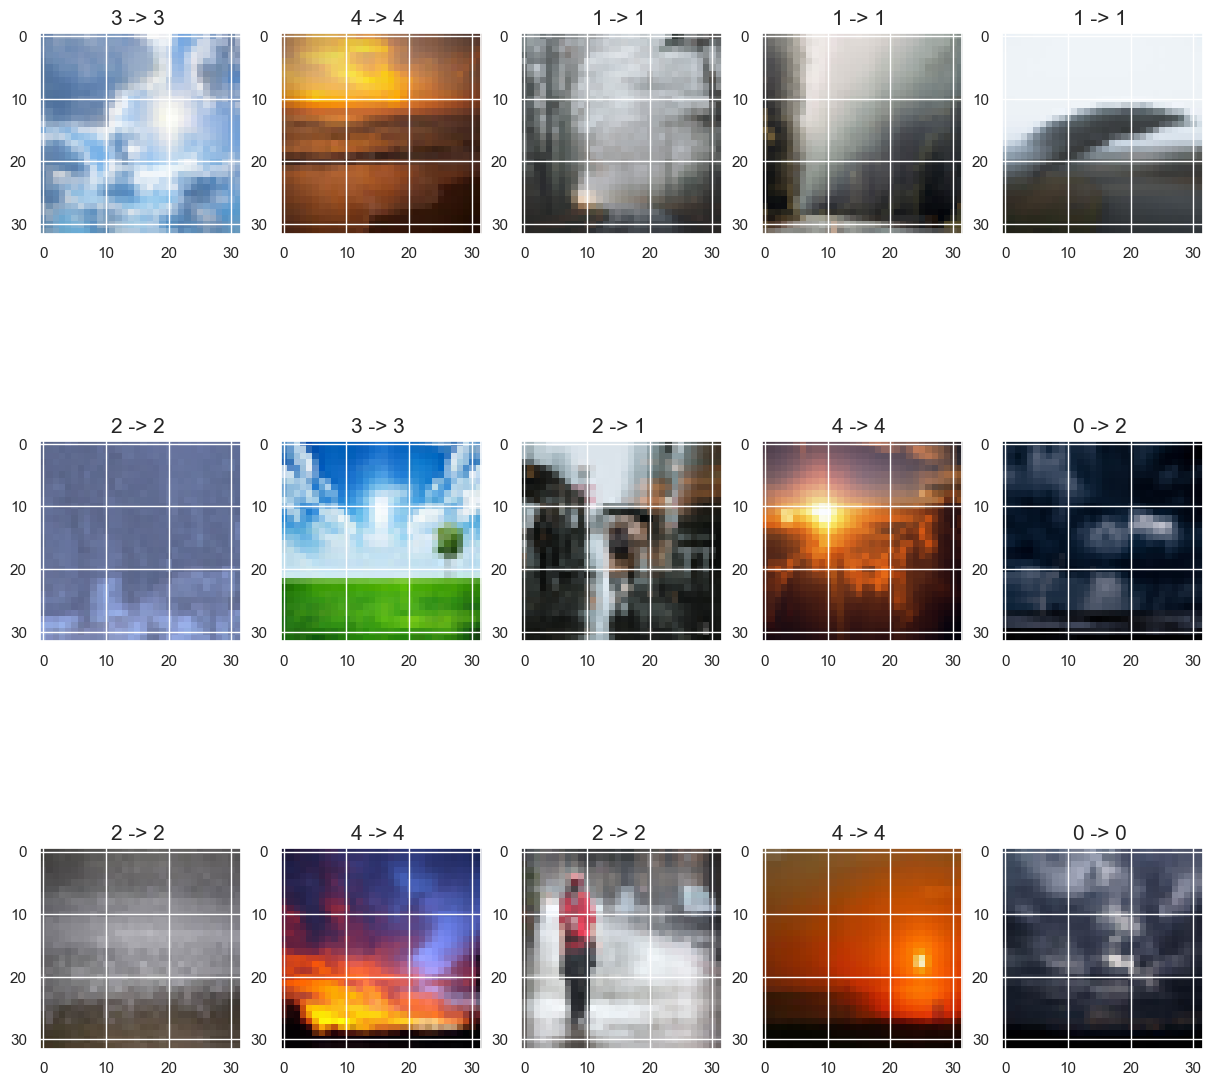

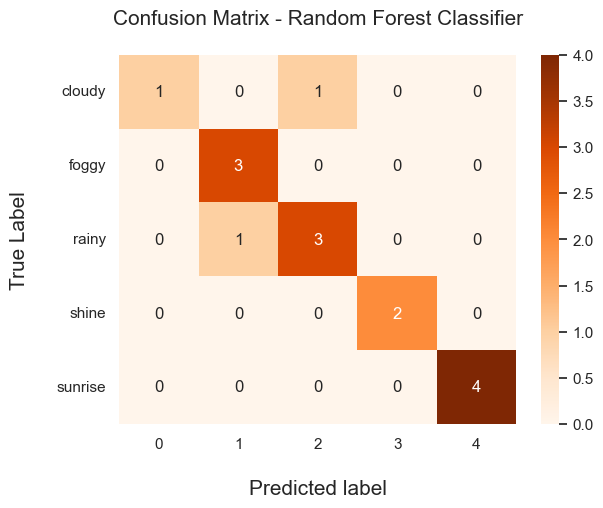

<Figure size 1500x1500 with 0 Axes>

In [27]:
plotPrediction(test_x, test_y, rfc.predict(test_x))
plotConfusionMatrix(test_y, rfc.predict(test_x), 'Random Forest Classifier')

# Support Vector Machine (SVM)

**kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} default='rbf'**

In [28]:
from sklearn.svm import SVC

In [29]:
svc_linear = SVC(C=1, kernel='linear', gamma='auto')
svc_linear.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_linear.predict(test_x))
print("Accuracy -", svc_linear.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 0 3 1 4 1 2 4 0 4 0]
Accuracy - 0.7333333333333333


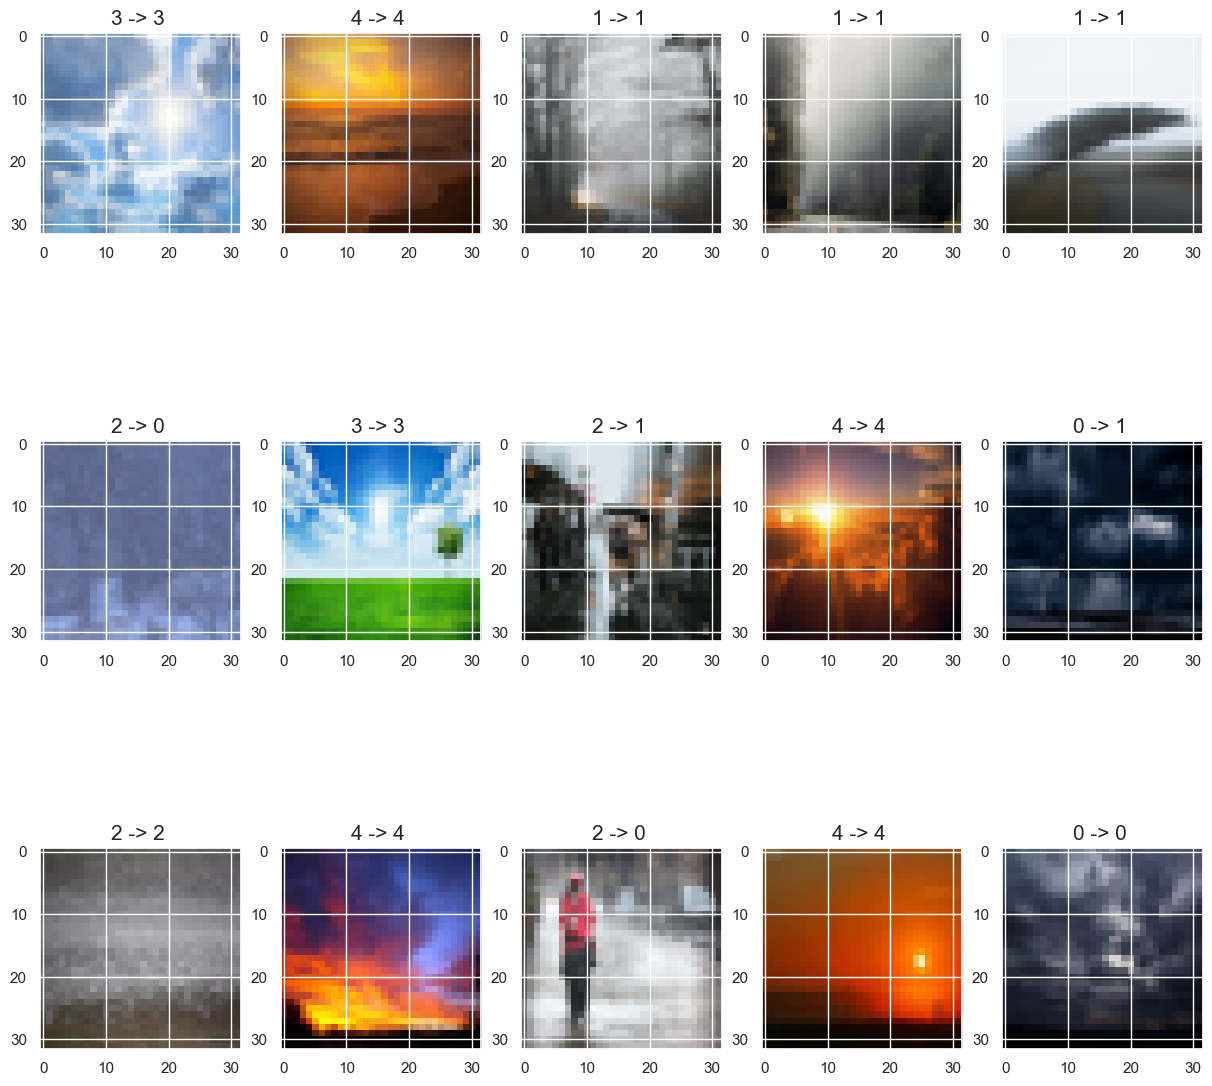

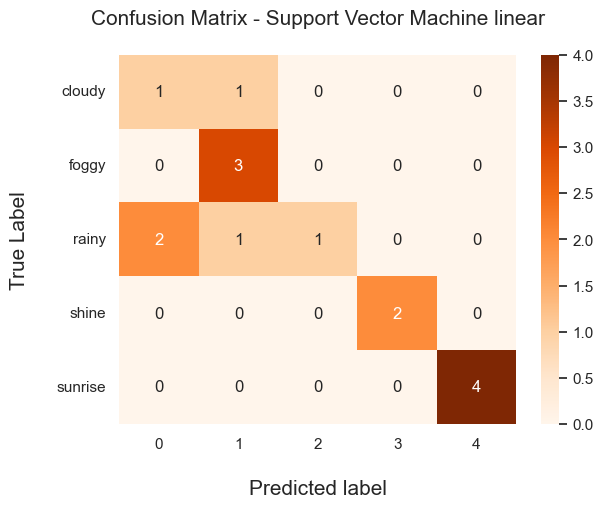

<Figure size 1500x1500 with 0 Axes>

In [30]:
plotPrediction(test_x, test_y, svc_linear.predict(test_x))
plotConfusionMatrix(test_y, svc_linear.predict(test_x), 'Support Vector Machine linear')

**kernel='poly'**

In [31]:
svc_poly = SVC(C=1, kernel='poly', gamma='auto')
svc_poly.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_poly.predict(test_x))
print("Accuracy -", svc_poly.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 0 2 1 2 3 4 4 4 4 4 2 4 4]
Accuracy - 0.6


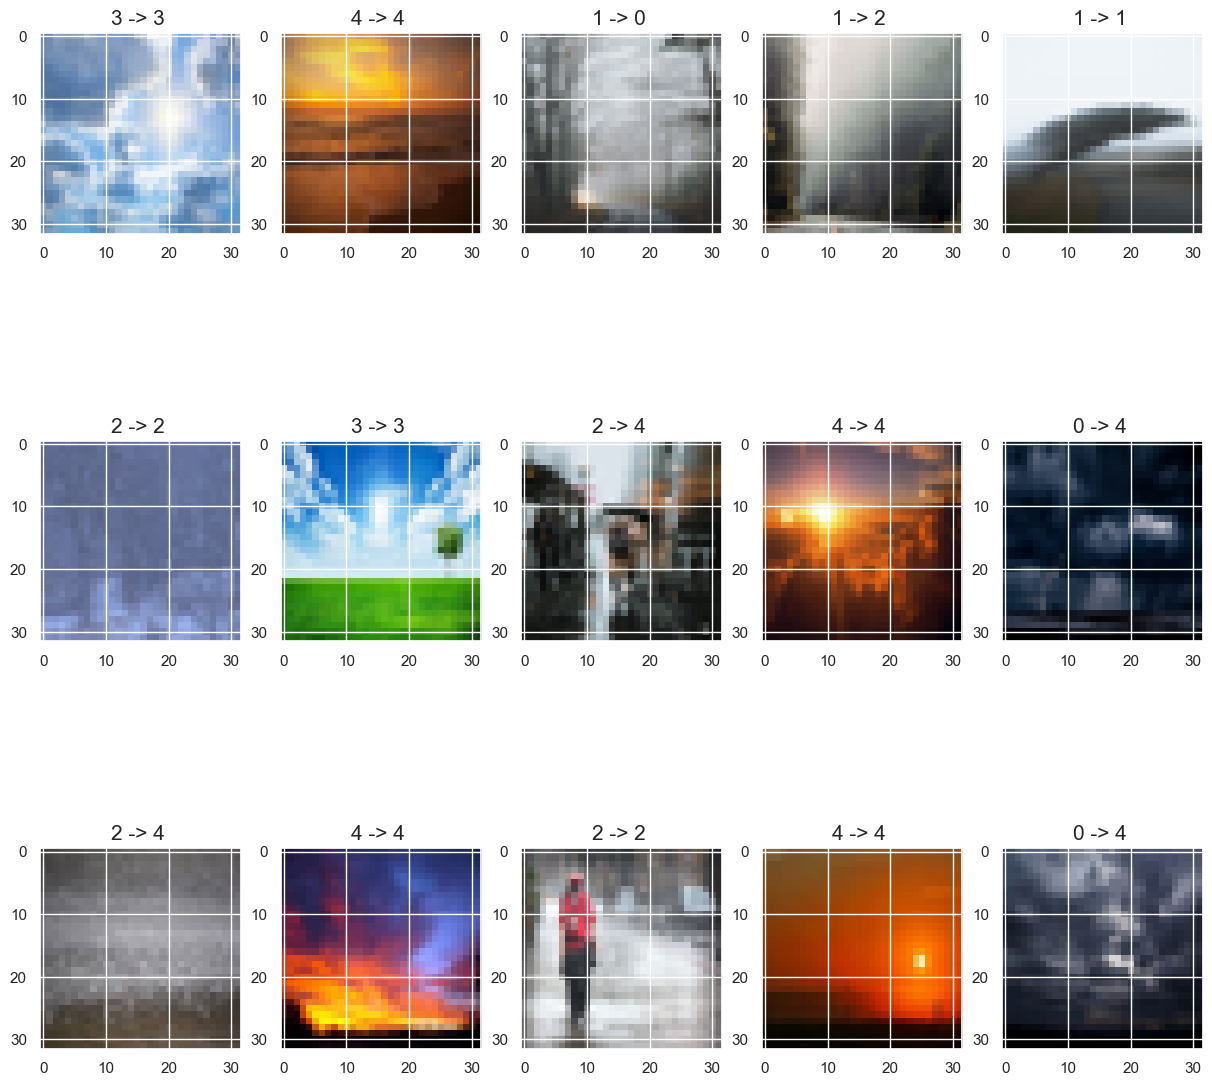

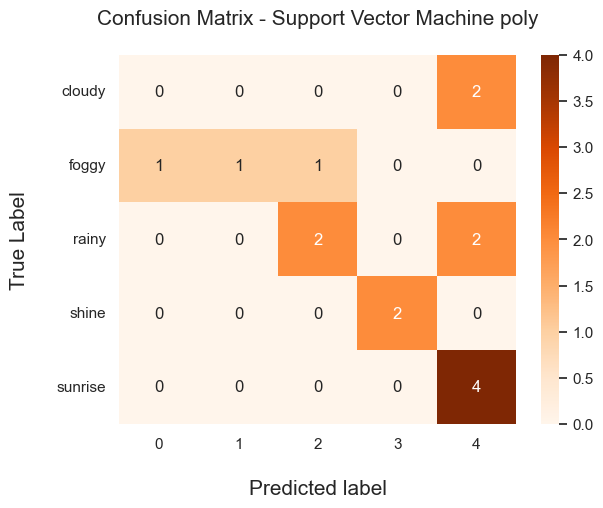

<Figure size 1500x1500 with 0 Axes>

In [32]:
plotPrediction(test_x, test_y, svc_poly.predict(test_x))
plotConfusionMatrix(test_y, svc_poly.predict(test_x), 'Support Vector Machine poly')

In [33]:
svc_rbf = SVC(C=1, kernel='rbf', gamma='auto')
svc_rbf.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_rbf.predict(test_x))
print("Accuracy -", svc_rbf.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 0 4 2 4 0]
Accuracy - 0.8


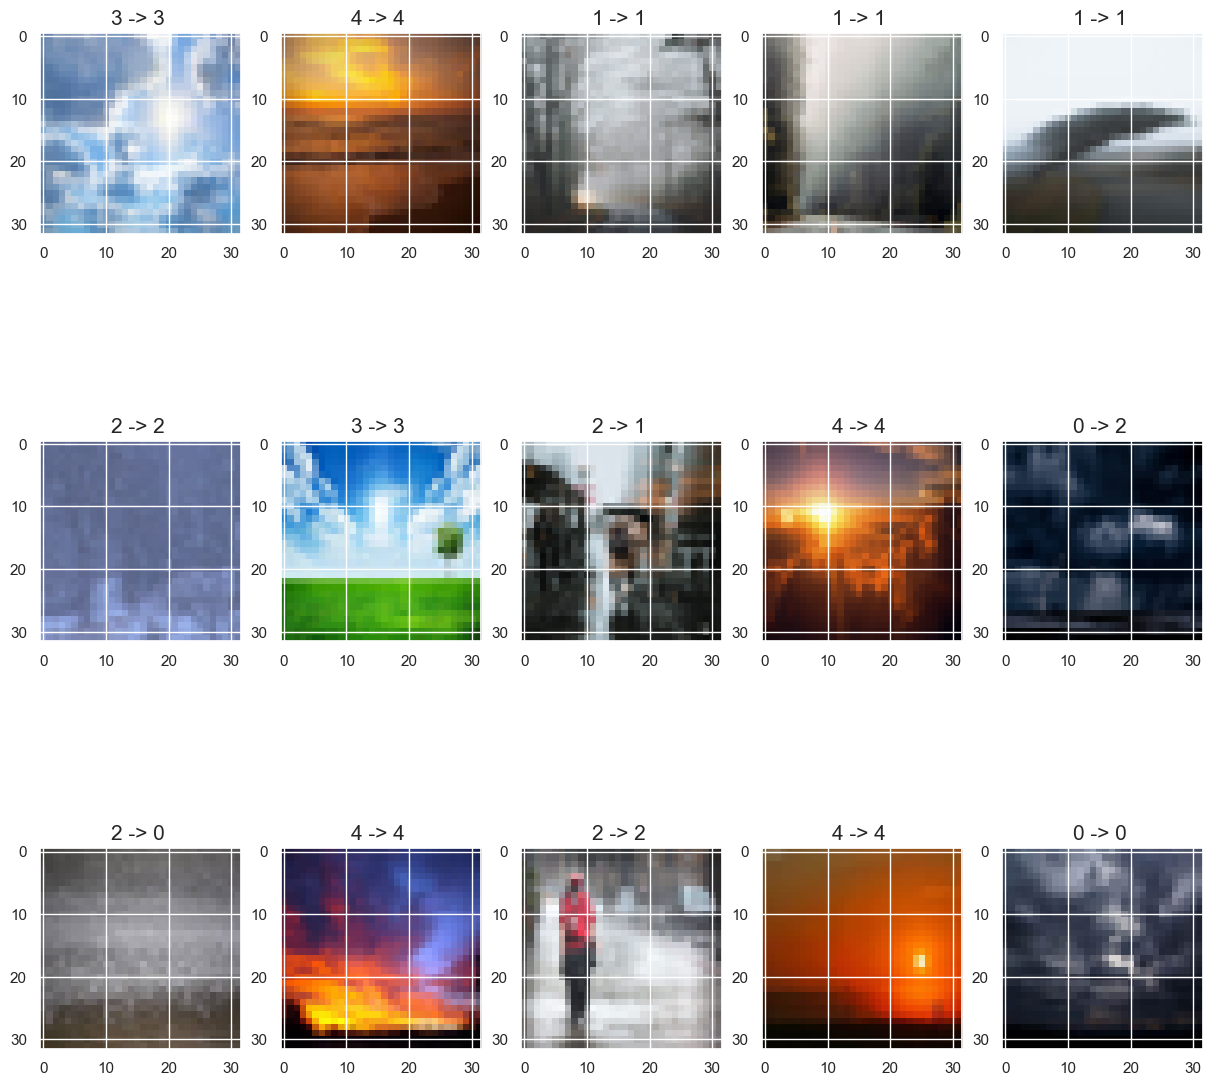

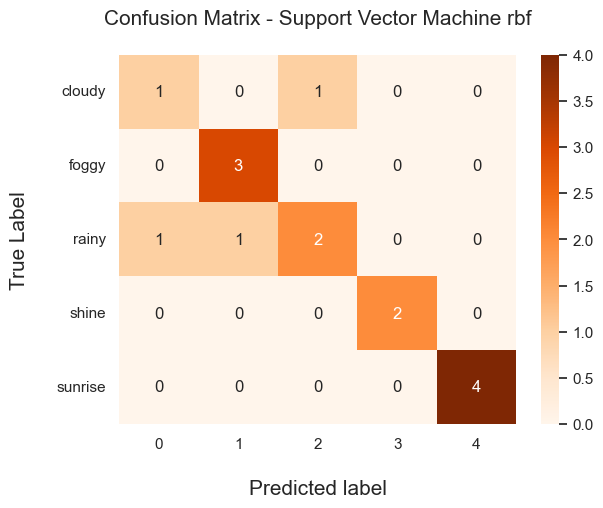

<Figure size 1500x1500 with 0 Axes>

In [34]:
plotPrediction(test_x, test_y, svc_rbf.predict(test_x))
plotConfusionMatrix(test_y, svc_rbf.predict(test_x), 'Support Vector Machine rbf')

In [35]:
svc_sigmoid = SVC(C=1, kernel='sigmoid', gamma='auto')
svc_sigmoid.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", svc_sigmoid.predict(test_x))
print("Accuracy -", svc_sigmoid.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 2 0 4 2 4 0]
Accuracy - 0.8


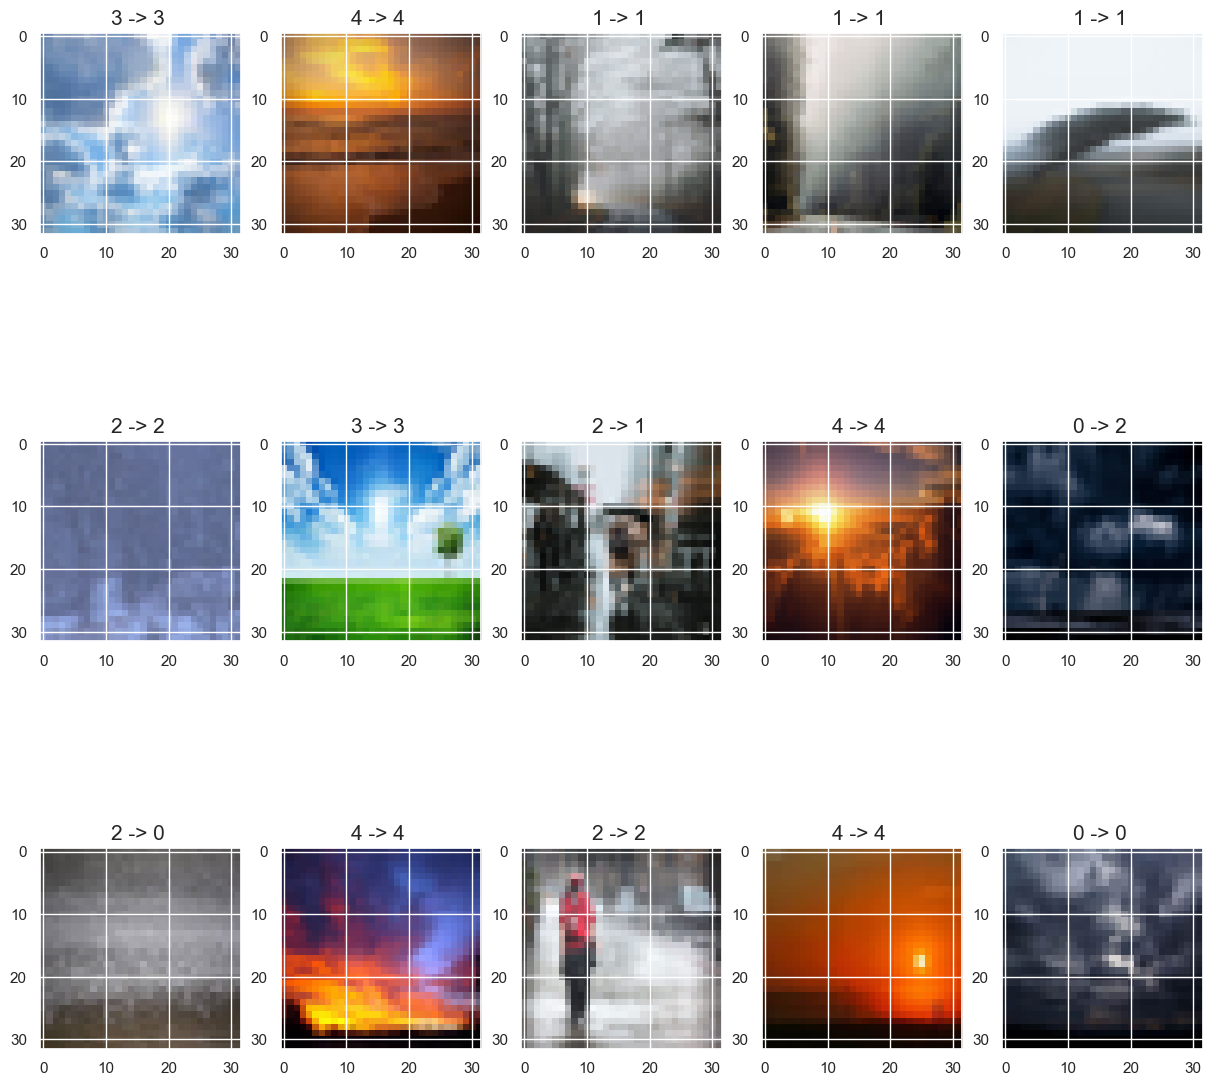

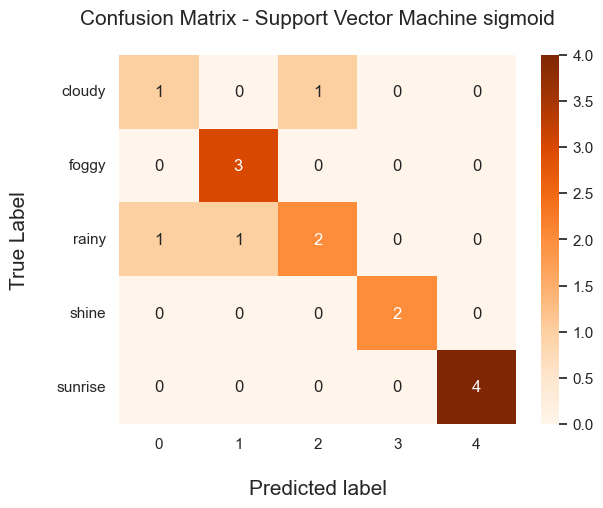

<Figure size 1500x1500 with 0 Axes>

In [36]:
plotPrediction(test_x, test_y, svc_sigmoid.predict(test_x))
plotConfusionMatrix(test_y, svc_sigmoid.predict(test_x), 'Support Vector Machine sigmoid')

# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb = GaussianNB()
nb.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", nb.predict(test_x))
print("Accuracy -", nb.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 4 0 4 3 4 4]
Accuracy - 0.6666666666666666


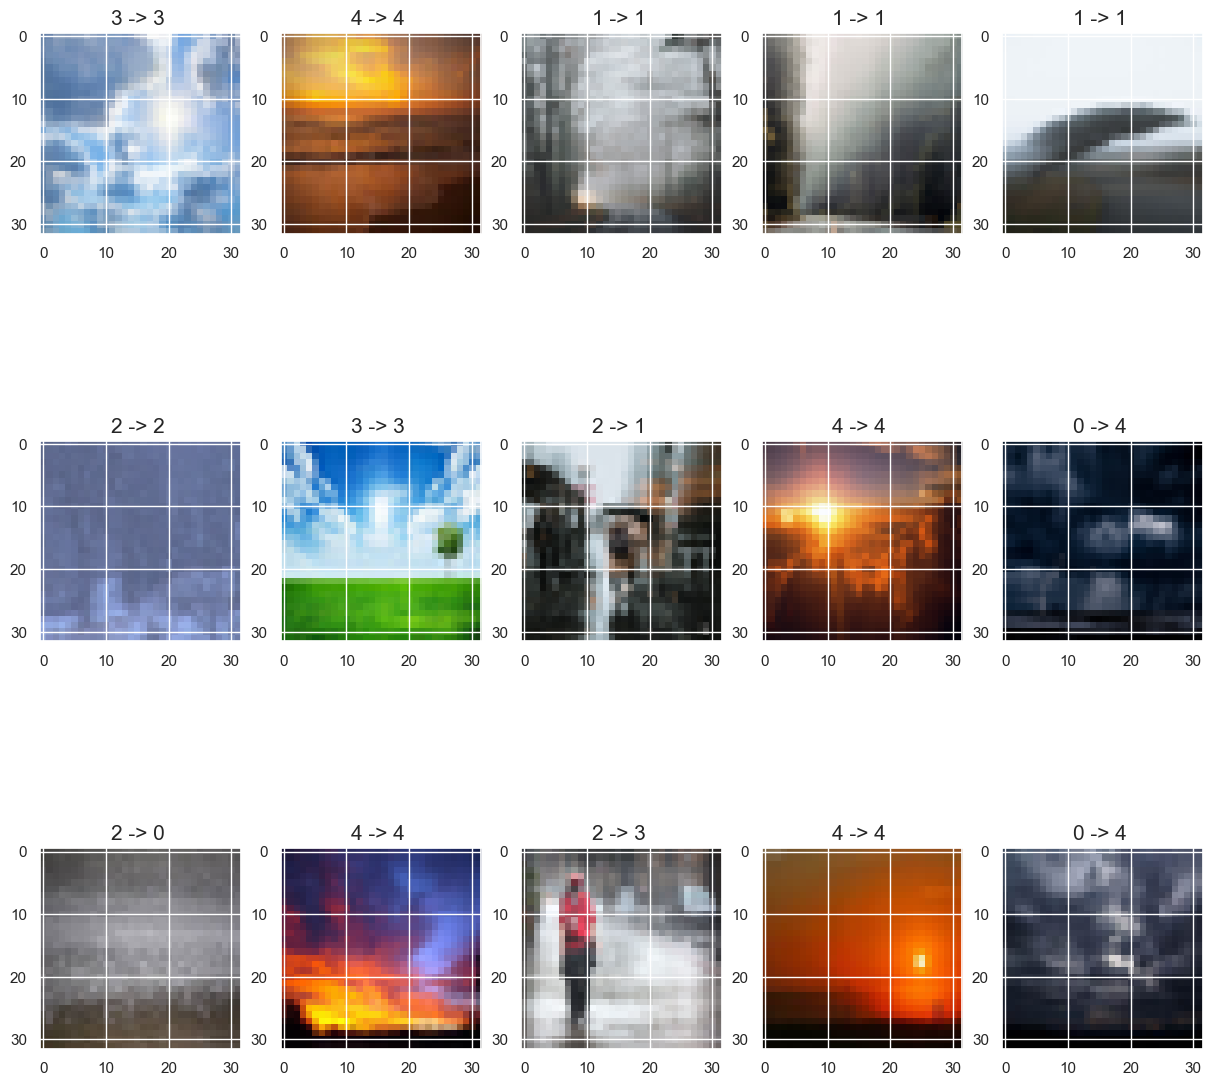

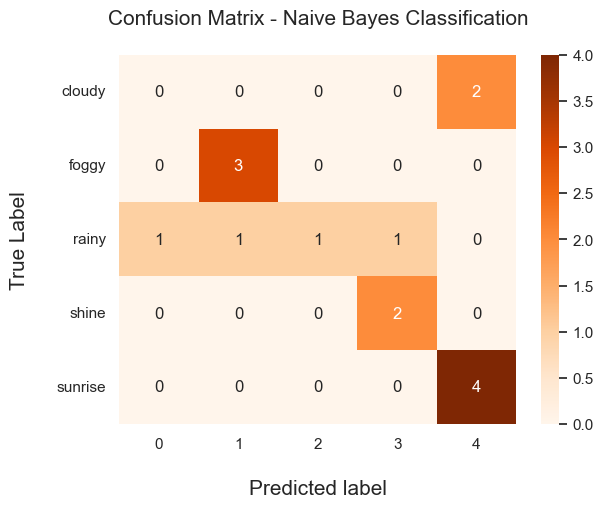

<Figure size 1500x1500 with 0 Axes>

In [39]:
plotPrediction(test_x, test_y, nb.predict(test_x))
plotConfusionMatrix(test_y, nb.predict(test_x), 'Naive Bayes Classification')

# K-Nearest Neighbors (KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
params = {
    'n_neighbors': range(1, len(test_y)//2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = GridSearchCV(KNeighborsClassifier(), params)
knn.fit(train_x, train_y)

c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 7),
                         'weights': ['uniform', 'distance']})

In [42]:
print("Actual Result -", test_y)
print("Predicted Result -", knn.predict(test_x))
print("Accuracy -", knn.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 1 1 1 2 3 1 4 1 2 4 2 4 1]
Accuracy - 0.8


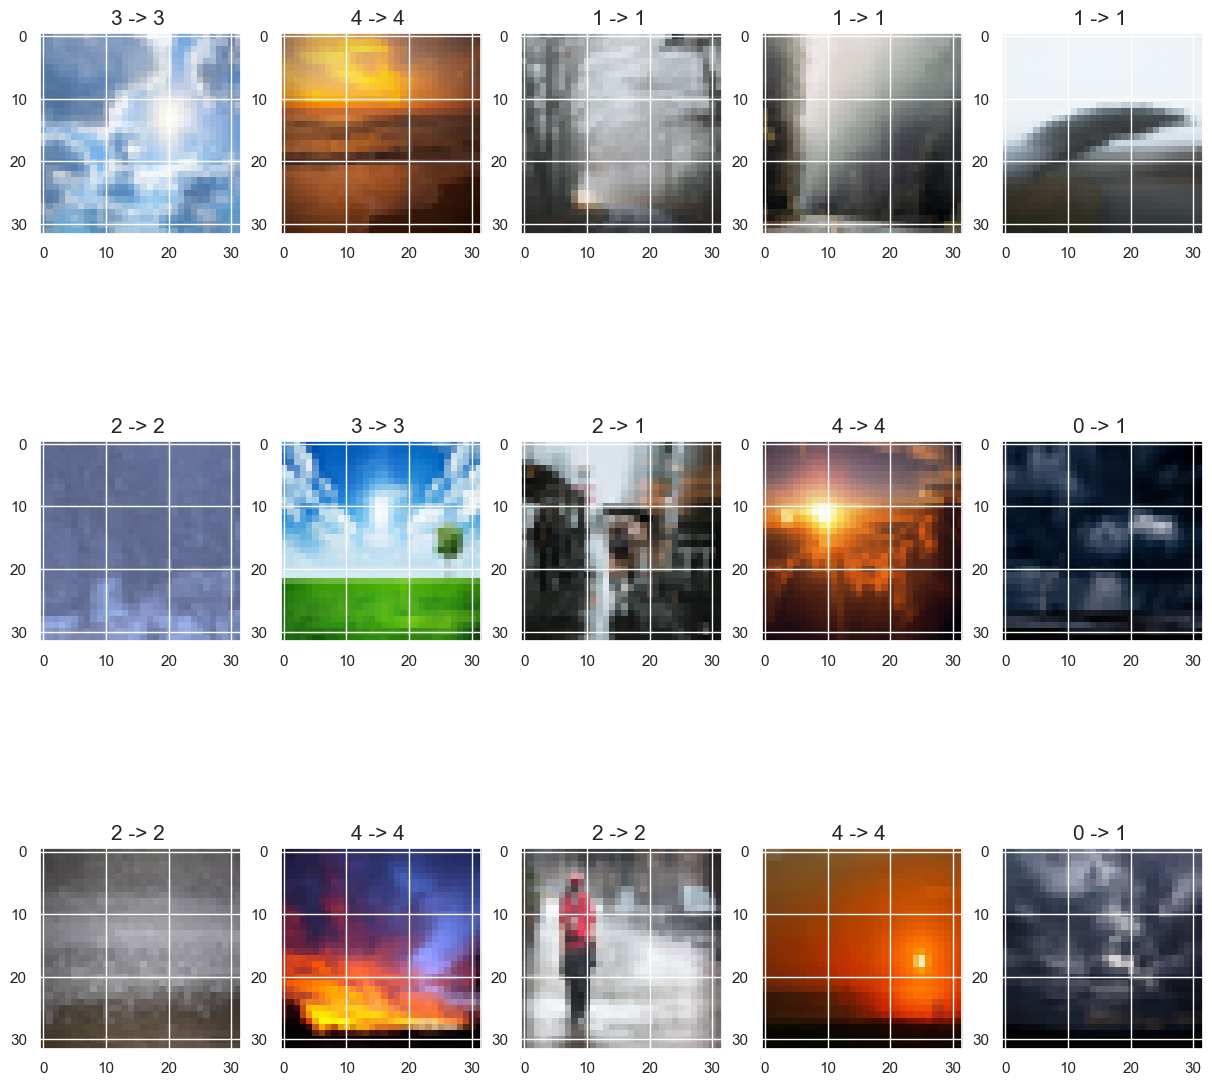

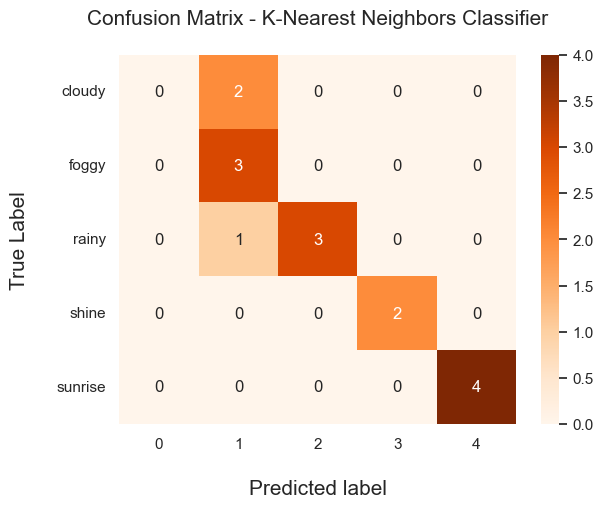

<Figure size 1500x1500 with 0 Axes>

In [43]:
plotPrediction(test_x, test_y, knn.predict(test_x))
plotConfusionMatrix(test_y, knn.predict(test_x), 'K-Nearest Neighbors Classifier')

# K-Means Clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [45]:
kmean = KMeans(n_clusters=5)
kmean.fit(train_x)
print("Actual Result -", test_y)
print("Predicted Result -", kmean.predict(test_x))
print("Accuracy -", accuracy_score(kmean.predict(test_x), test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [4 0 1 1 1 3 4 2 0 2 3 2 4 0 2]
Accuracy - 0.26666666666666666


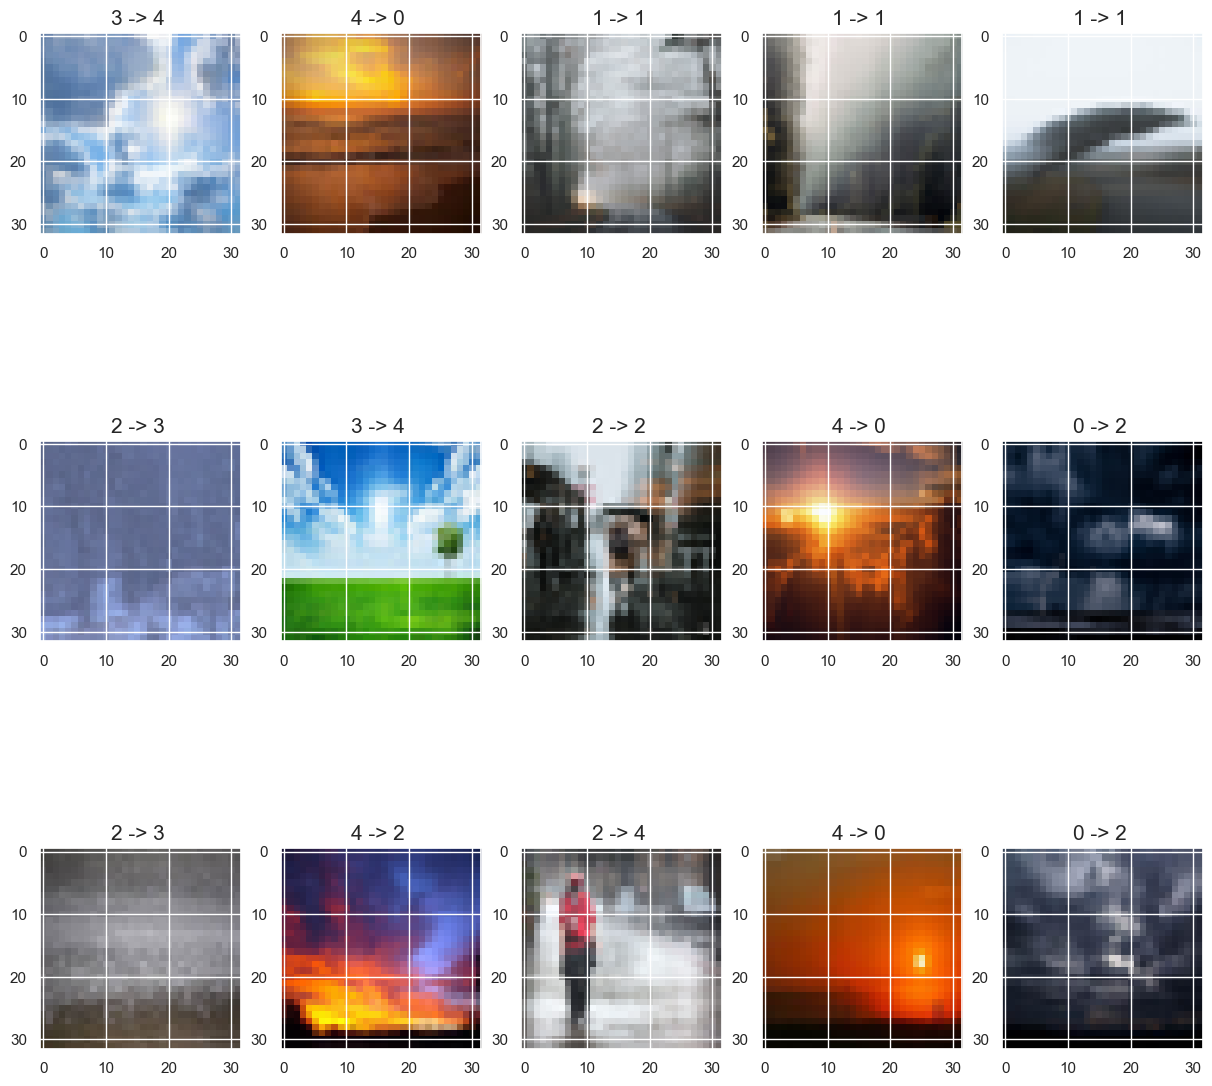

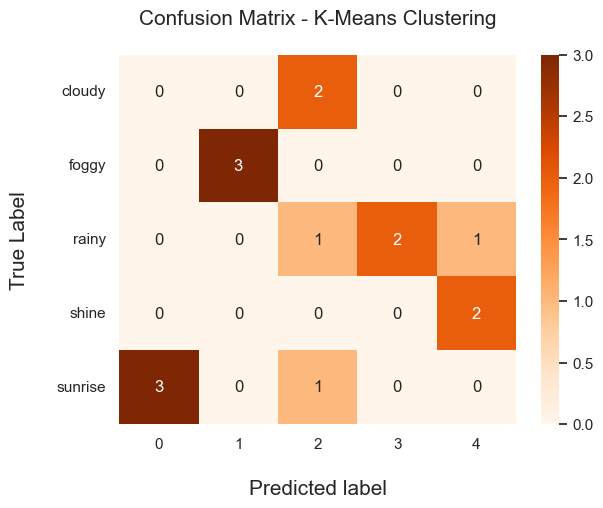

<Figure size 1500x1500 with 0 Axes>

In [46]:
plotPrediction(test_x, test_y, kmean.predict(test_x))
plotConfusionMatrix(test_y, kmean.predict(test_x), 'K-Means Clustering')

# Perceptron

In [47]:
from sklearn.neural_network import MLPClassifier

In [48]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
print("Actual Result -", test_y)
print("Predicted Result -", mlp.predict(test_x))
print("Accuracy -", mlp.score(test_x, test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [3 4 0 1 1 0 3 1 4 0 0 4 2 4 0]
Accuracy - 0.7333333333333333


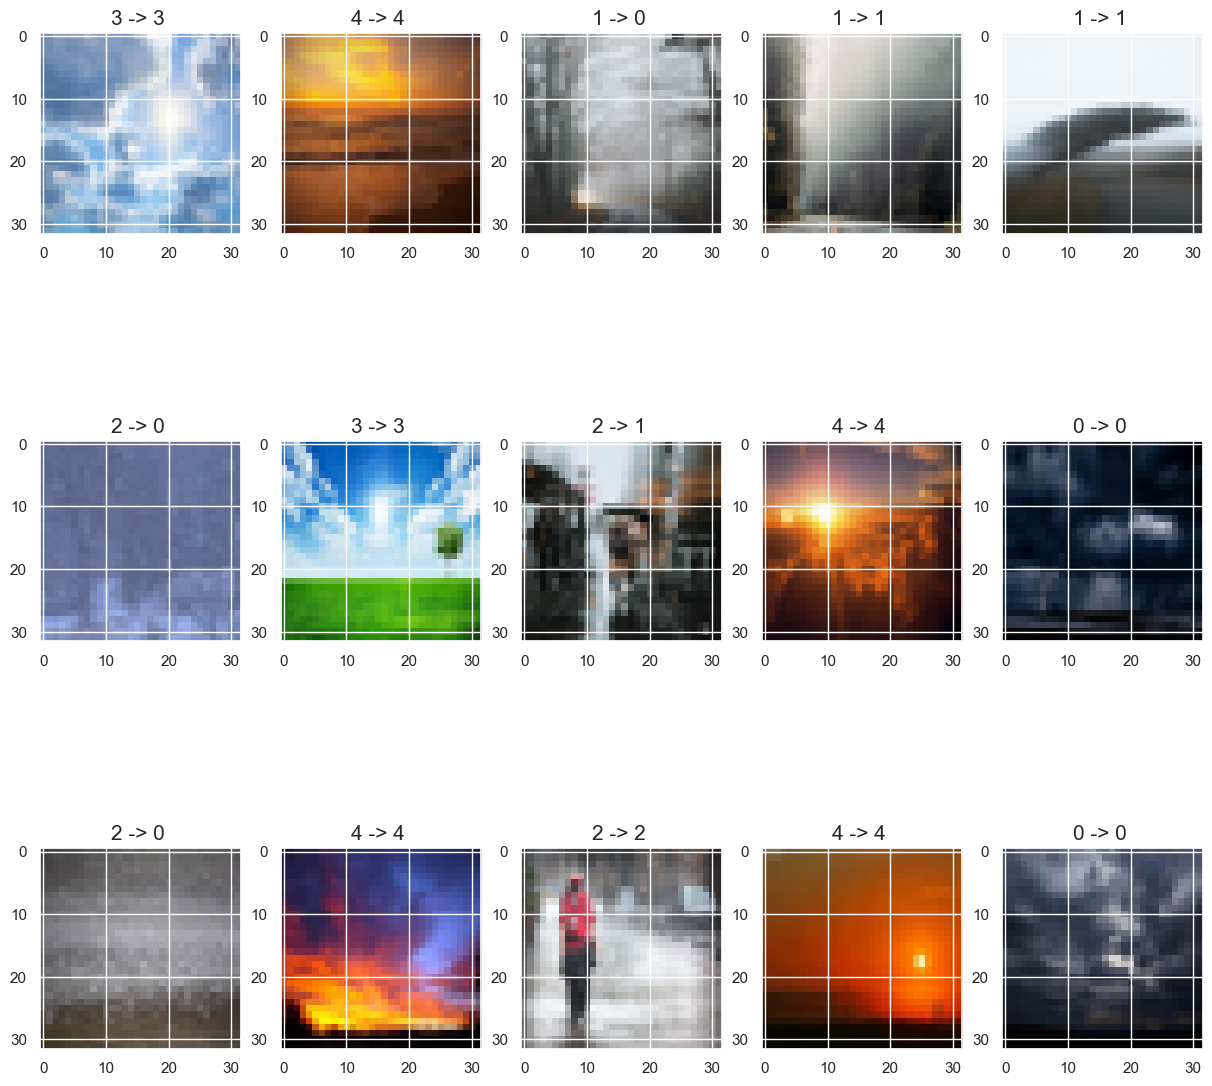

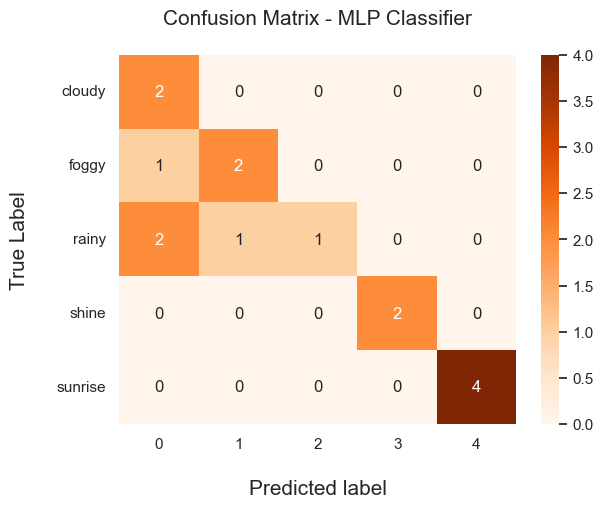

<Figure size 1500x1500 with 0 Axes>

In [49]:
plotPrediction(test_x, test_y, mlp.predict(test_x))
plotConfusionMatrix(test_y, mlp.predict(test_x), 'MLP Classifier')

# Binary Classifier

In [50]:
from sklearn.linear_model import SGDClassifier

**Cloudy Image Classification**

In [51]:
y_train = (train_y == 1)
y_test = (test_y == 1)

In [52]:
sgd_clf = SGDClassifier()
sgd_clf.fit(train_x, y_train)
print("Actual Result -", test_y)
print("Predicted Result -", sgd_clf.predict(test_x))
print("Accuracy -", sgd_clf.score(test_x, y_test))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0]
Predicted Result - [False False False False False False False  True False False False False
 False False False]
Accuracy - 0.7333333333333333


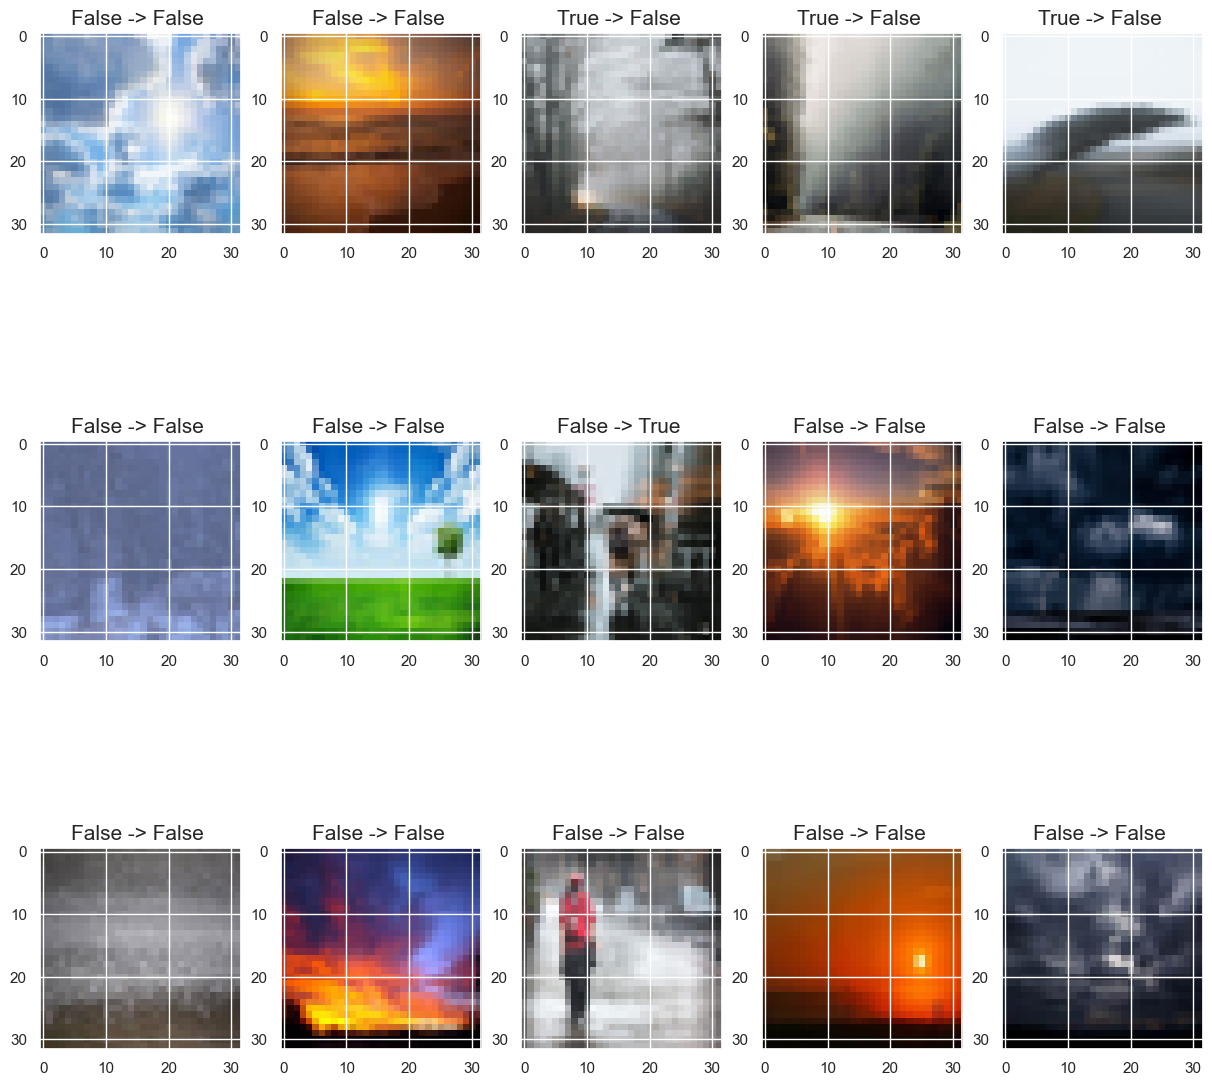

In [53]:
plotPrediction(test_x, y_test, sgd_clf.predict(test_x))

# Principal Component Analysis (PCA)

In [89]:
from sklearn.decomposition import PCA

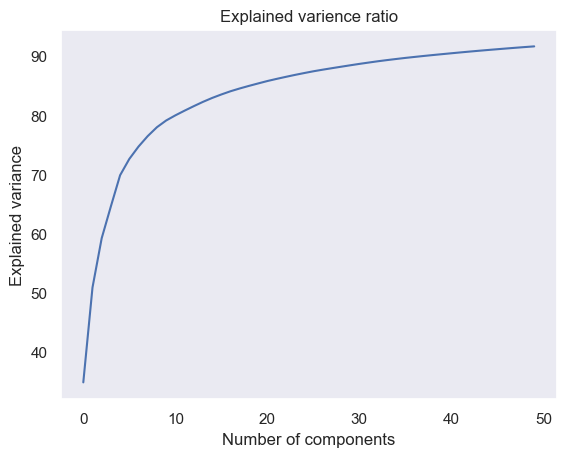

In [94]:
pca_50 = PCA(n_components=50)
pca_50.fit(x_new)
plt.plot(np.cumsum(pca_50.explained_variance_ratio_ * 100))
plt.title('Explained varience ratio')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.grid()


**n_components=5**

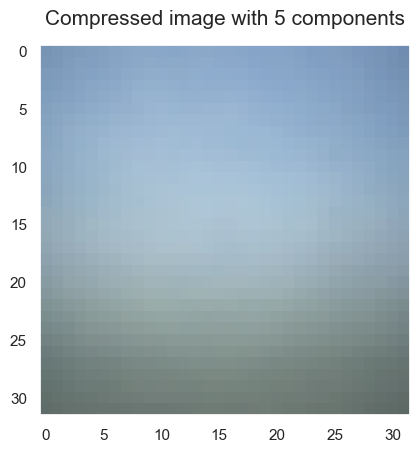

In [98]:
pca_5 = PCA(n_components=5)
pca_5_reduced = pca_5.fit_transform(x_new)
pca_5_recovered = pca_5.inverse_transform(pca_5_reduced)

image_pca_5 = pca_5_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_5)
plt.title('Compressed image with 5 components', fontsize=15, pad=15)
plt.grid(False)


In [99]:
kmean_pca_5 = KMeans(n_clusters=5)
kmean_pca_5.fit(pca_5_reduced)
y_pred = kmean_pca_5.predict(pca_5_reduced)
print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_5.predict(pca_5_reduced))
print("Accuracy -", accuracy_score(kmean_pca_5.predict(pca_5_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [4 1 4 ... 2 2 2]
Accuracy - 0.13


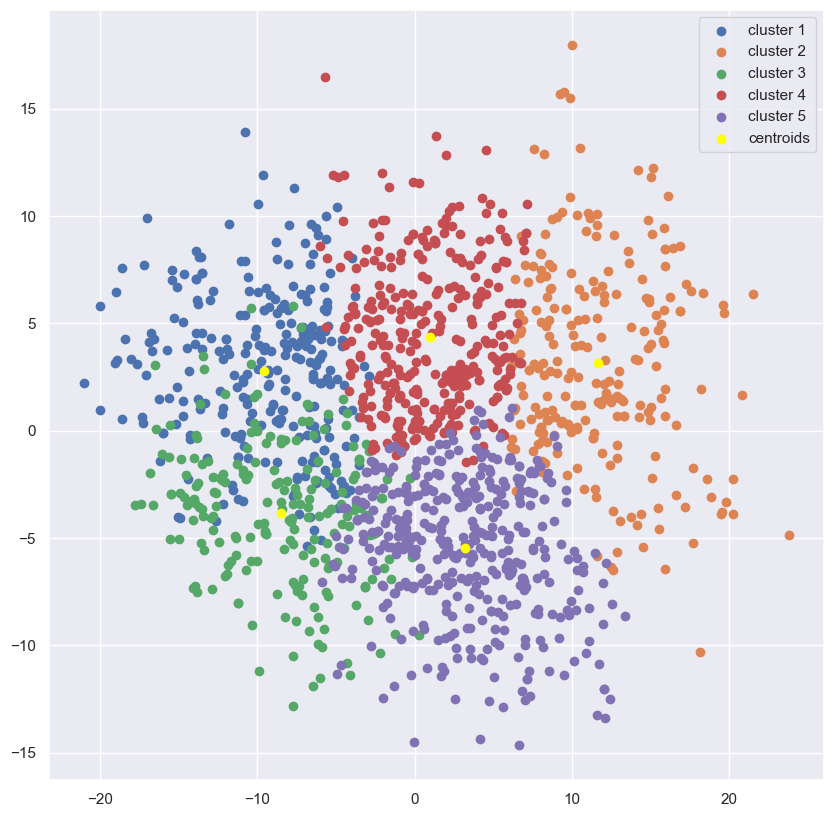

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(pca_5_reduced[y_pred==0, 0], pca_5_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_5_reduced[y_pred==1, 0], pca_5_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_5_reduced[y_pred==2, 0], pca_5_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_5_reduced[y_pred==3, 0], pca_5_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_5_reduced[y_pred==4, 0], pca_5_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_5.cluster_centers_[:,0], kmean_pca_5.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()


**n_components=10**

Text(0.5, 1.0, 'Compressed image with 10 components')

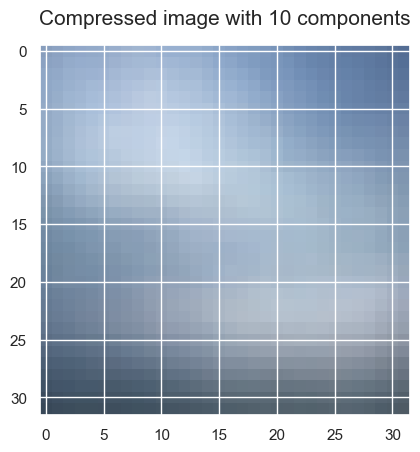

In [101]:
pca_10 = PCA(n_components=10)
pca_10_reduced = pca_10.fit_transform(x_new)
pca_10_recovered = pca_10.inverse_transform(pca_10_reduced)

image_pca_10 = pca_10_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_10)
plt.title('Compressed image with 10 components', fontsize=15, pad=15)

In [102]:
kmean_pca_10 = KMeans(n_clusters=5)
kmean_pca_10.fit(pca_10_reduced)
y_pred = kmean_pca_10.predict(pca_10_reduced)
print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_10.predict(pca_10_reduced))
print("Accuracy -", accuracy_score(kmean_pca_10.predict(pca_10_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [3 2 3 ... 4 4 4]
Accuracy - 0.30466666666666664


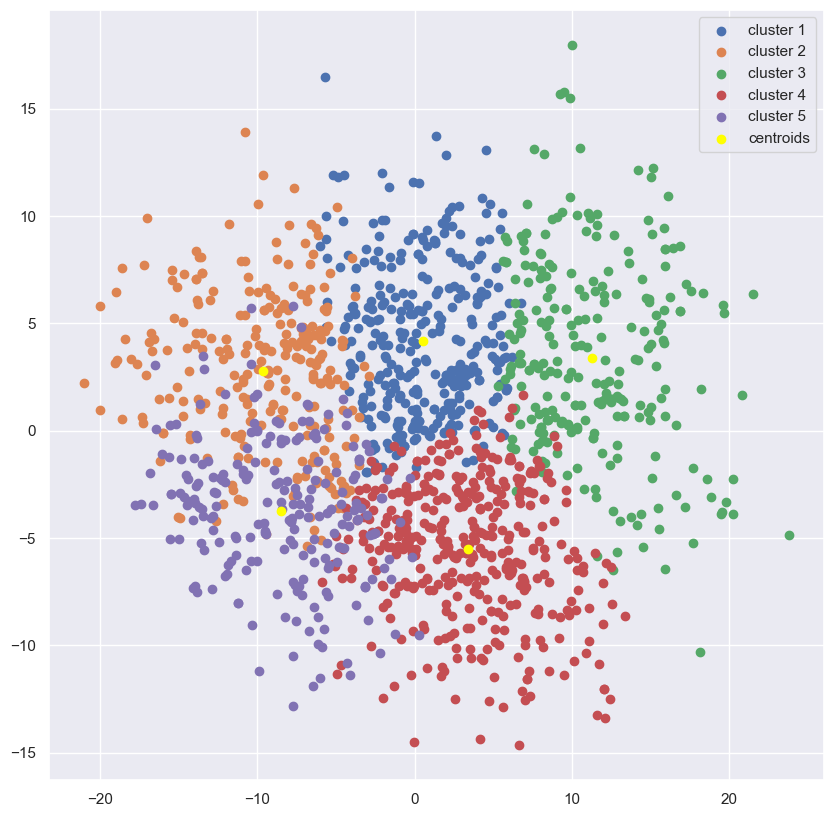

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(pca_10_reduced[y_pred==0, 0], pca_10_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_10_reduced[y_pred==1, 0], pca_10_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_10_reduced[y_pred==2, 0], pca_10_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_10_reduced[y_pred==3, 0], pca_10_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_10_reduced[y_pred==4, 0], pca_10_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_10.cluster_centers_[:,0], kmean_pca_10.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

**n_components=15**

Text(0.5, 1.0, 'Compressed image with 15 components')

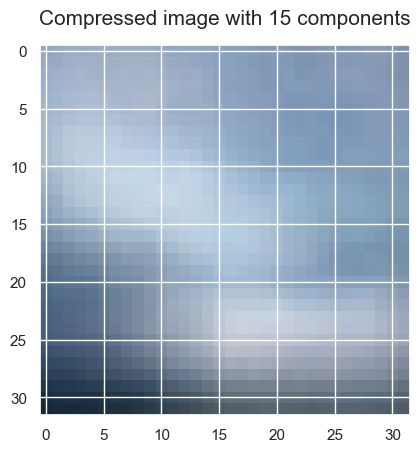

In [104]:
pca_15 = PCA(n_components=15)
pca_15_reduced = pca_15.fit_transform(x_new)
pca_15_recovered = pca_15.inverse_transform(pca_15_reduced)

image_pca_15 = pca_15_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_15)
plt.title('Compressed image with 15 components', fontsize=15, pad=15)

In [105]:
kmean_pca_15 = KMeans(n_clusters=5)
kmean_pca_15.fit(pca_15_reduced)
y_pred = kmean_pca_15.predict(pca_15_reduced)

print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_15.predict(pca_15_reduced))
print("Accuracy -", accuracy_score(kmean_pca_15.predict(pca_15_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [2 1 2 ... 4 4 4]
Accuracy - 0.2653333333333333


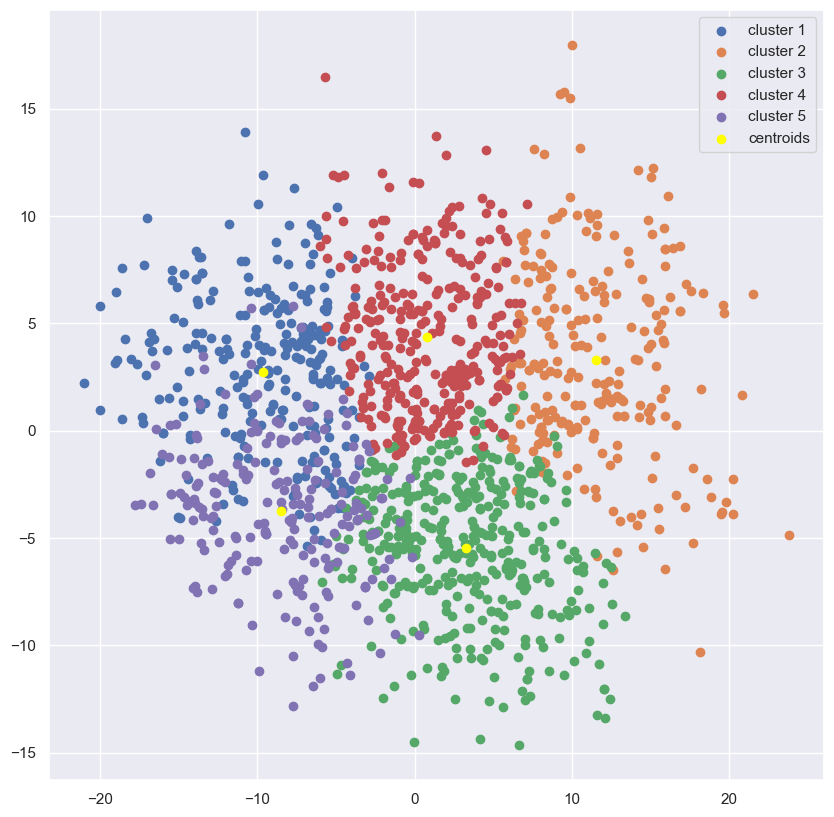

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(pca_15_reduced[y_pred==0, 0], pca_15_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_15_reduced[y_pred==1, 0], pca_15_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_15_reduced[y_pred==2, 0], pca_15_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_15_reduced[y_pred==3, 0], pca_15_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_15_reduced[y_pred==4, 0], pca_15_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_15.cluster_centers_[:,0], kmean_pca_15.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

**n_components=30**

Text(0.5, 1.0, 'Compressed image with 30 components')

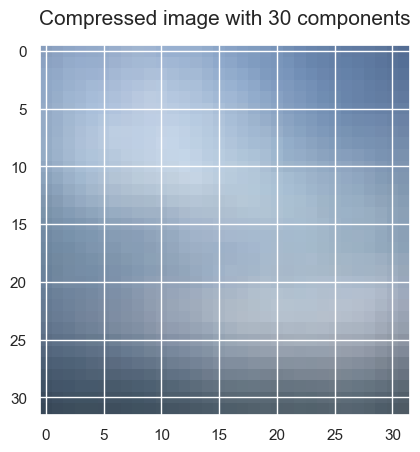

In [107]:
pca_30 = PCA(n_components=30)
pca_30_reduced = pca_30.fit_transform(x_new)
pca_30_recovered = pca_30.inverse_transform(pca_30_reduced)

image_pca_30 = pca_10_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_30)
plt.title('Compressed image with 30 components', fontsize=15, pad=15)

In [108]:
kmean_pca_30 = KMeans(n_clusters=5)
kmean_pca_30.fit(pca_30_reduced)
y_pred = kmean_pca_30.predict(pca_30_reduced)

print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_30.predict(pca_30_reduced))
print("Accuracy -", accuracy_score(kmean_pca_30.predict(pca_30_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [1 0 1 ... 4 4 4]
Accuracy - 0.36933333333333335


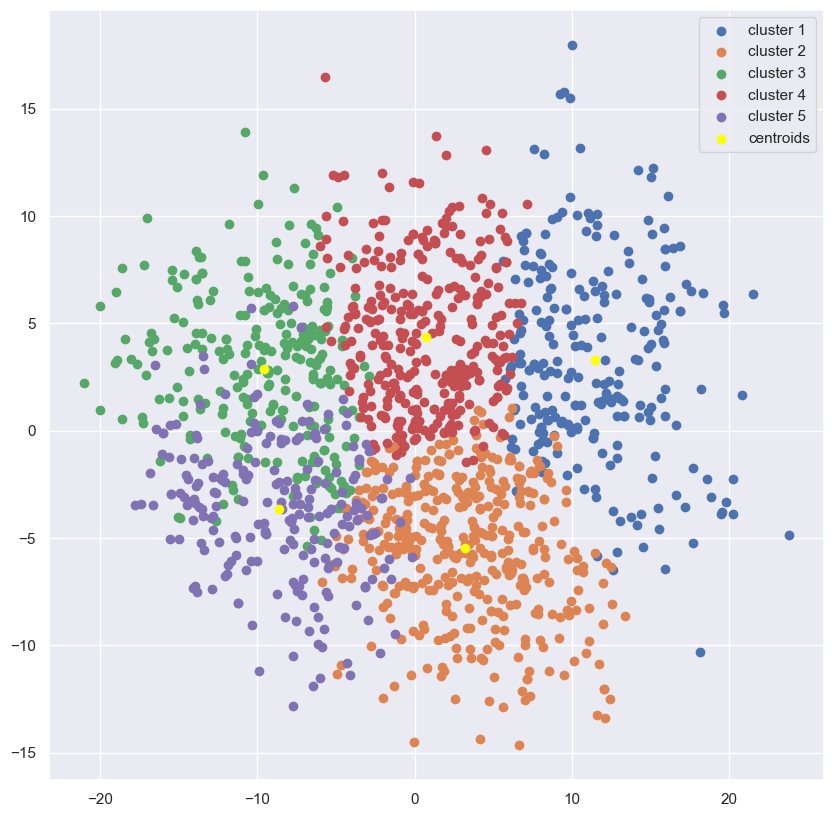

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(pca_30_reduced[y_pred==0, 0], pca_30_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_30_reduced[y_pred==1, 0], pca_30_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_30_reduced[y_pred==2, 0], pca_30_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_30_reduced[y_pred==3, 0], pca_30_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_30_reduced[y_pred==4, 0], pca_30_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_30.cluster_centers_[:,0], kmean_pca_30.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

**n_components=50**

Text(0.5, 1.0, 'Compressed image with 50 components')

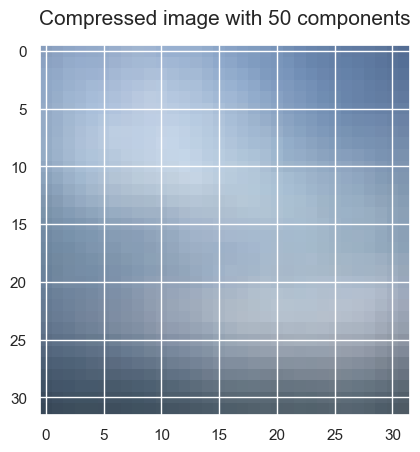

In [110]:
pca_50 = PCA(n_components=50)
pca_50_reduced = pca_50.fit_transform(x_new)
pca_50_recovered = pca_50.inverse_transform(pca_50_reduced)

image_pca_50 = pca_10_recovered[1].reshape([32, 32, 3])
plt.imshow(image_pca_50)
plt.title('Compressed image with 50 components', fontsize=15, pad=15)

In [111]:
kmean_pca_50 = KMeans(n_clusters=5)
kmean_pca_50.fit(pca_50_reduced)
y_pred = kmean_pca_50.predict(pca_50_reduced)

print("Actual Result -", y_new)
print("Predicted Result -", kmean_pca_50.predict(pca_50_reduced))
print("Accuracy -", accuracy_score(kmean_pca_50.predict(pca_50_reduced), y_new))

Actual Result - [0 0 0 ... 4 4 4]
Predicted Result - [0 4 0 ... 1 1 1]
Accuracy - 0.17133333333333334


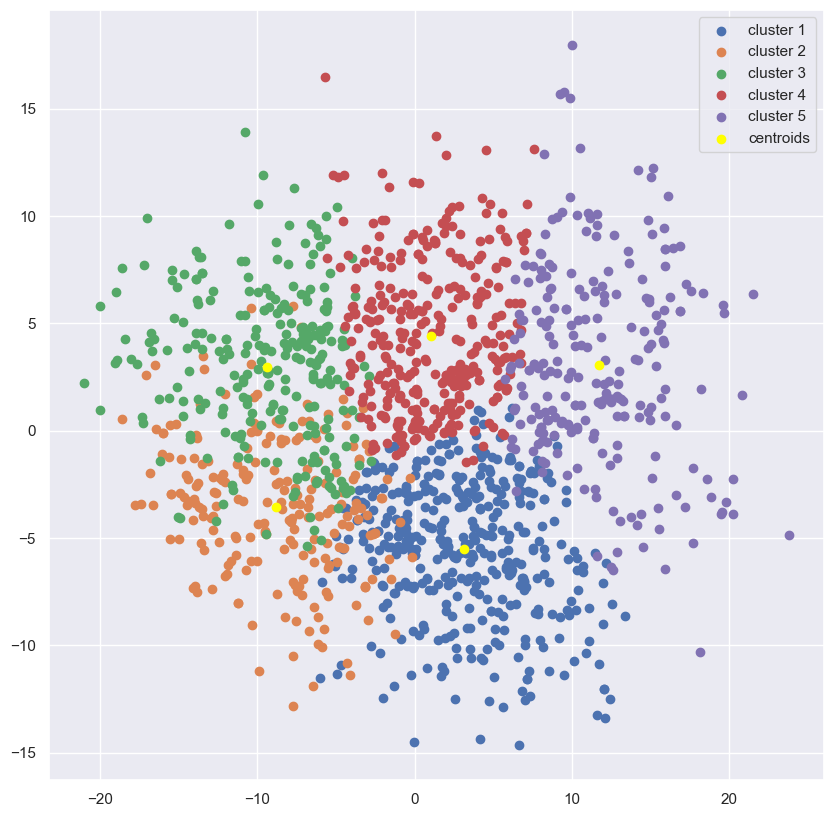

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(pca_50_reduced[y_pred==0, 0], pca_50_reduced[y_pred==0, 1], label='cluster 1')
plt.scatter(pca_50_reduced[y_pred==1, 0], pca_50_reduced[y_pred==1, 1], label='cluster 2')
plt.scatter(pca_50_reduced[y_pred==2, 0], pca_50_reduced[y_pred==2, 1], label='cluster 3')
plt.scatter(pca_50_reduced[y_pred==3, 0], pca_50_reduced[y_pred==3, 1], label='cluster 4')
plt.scatter(pca_50_reduced[y_pred==4, 0], pca_50_reduced[y_pred==4, 1], label='cluster 5')
plt.scatter(kmean_pca_50.cluster_centers_[:,0], kmean_pca_50.cluster_centers_[:,1], c='yellow', label='centroids')
plt.legend()

# Gaussian Mixture Model (GMM)

In [54]:
def scale_vector(x):
    mn = x.sum(axis=0).sum(axis=0)/(x.shape[0]*x.shape[1])
    val = mn/np.linalg.norm(mn, ord=None)
    return [val]

In [55]:
data = [scale_vector(x[i]) for i in range(len(y_new))]
data = pd.DataFrame(data, columns=["rgb"])
df = data.rgb.apply(list).apply(pd.Series)
df.columns = ['Red', 'Green', 'Blue']

In [56]:
df

Red     Green      Blue
0     0.577350  0.577350  0.577350
1     0.506169  0.561680  0.654453
2     0.593079  0.593683  0.543873
3     0.546157  0.560938  0.622142
4     0.513856  0.560463  0.649487
...        ...       ...       ...
1495  0.842454  0.490802  0.222228
1496  0.971826  0.234646  0.022268
1497  0.885747  0.454015  0.096550
1498  0.918398  0.383346  0.097934
1499  0.899389  0.412629  0.144347

[1500 rows x 3 columns]

In [57]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df, y_new, test_size=0.2, random_state=42)
print(X_train1.shape) 
print(X_test1.shape)

(1200, 3)
(300, 3)


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


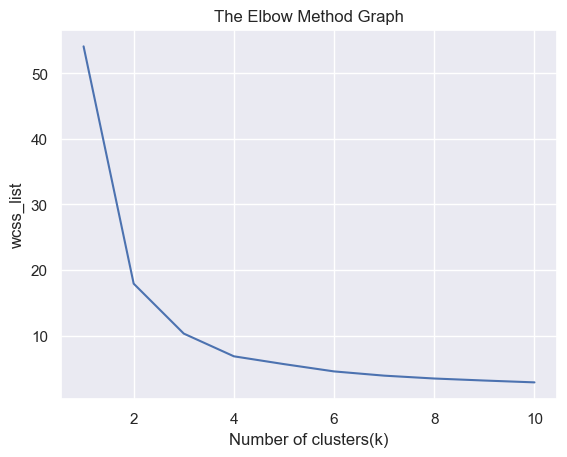

In [58]:
wcss_list = []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)  
    kmeans.fit(X_train1)  
    wcss_list.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [59]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X_test1.values)  

In [60]:
print("Actual Result -", y_test1)
print("Predicted Result -", y_predict)
# print("Accuracy -", accuracy_score(kmean.predict(tesX_testt_x), test_y))

Actual Result - [3 4 1 1 1 2 3 2 4 0 2 4 2 4 0 4 4 2 1 0 4 3 4 4 4 1 4 4 4 4 3 2 4 3 0 1 1
 1 3 0 4 1 4 2 3 1 1 1 2 3 2 1 3 4 1 2 0 1 1 3 2 1 1 0 2 1 1 3 4 0 1 2 2 0
 2 4 2 1 1 3 3 0 0 2 2 0 2 3 2 3 3 0 0 4 3 1 1 0 4 1 3 2 3 3 1 0 0 4 0 2 1
 4 2 0 0 1 2 0 0 3 3 4 4 1 0 4 4 2 4 1 4 0 3 4 1 0 1 1 3 0 4 0 4 0 1 4 2 3
 1 2 4 4 3 4 1 4 4 0 1 0 1 1 3 4 0 0 4 3 3 1 0 3 1 2 0 0 3 2 1 4 0 1 0 0 4
 2 3 1 3 4 1 2 4 4 3 0 3 0 2 1 3 2 1 1 4 3 0 2 1 2 0 4 2 4 0 1 4 1 4 0 4 3
 2 1 0 1 0 0 4 4 3 1 2 3 3 3 4 4 4 4 2 3 2 0 1 1 4 4 4 2 3 0 4 2 3 3 1 1 3
 4 3 0 1 3 4 4 1 0 3 2 1 0 1 4 2 4 4 4 1 4 4 4 4 2 0 2 0 4 0 4 1 4 0 4 2 3
 2 4 4 2]
Predicted Result - [3 0 1 1 1 3 3 1 0 3 1 4 1 2 3 1 4 1 3 1 4 3 2 0 4 1 1 1 4 0 3 1 4 1 1 1 1
 1 3 1 2 3 0 3 3 1 1 1 1 3 1 1 1 0 1 1 1 1 1 3 4 1 1 1 1 1 1 1 0 1 1 3 1 1
 1 0 1 1 0 3 3 1 1 1 1 1 1 3 4 3 1 1 1 4 3 1 1 1 3 0 1 1 3 3 1 1 1 0 1 1 4
 0 1 1 1 0 1 1 1 3 3 0 2 1 1 4 0 3 2 1 0 1 1 4 1 1 1 0 1 1 0 1 2 1 1 4 3 3
 3 1 0 4 1 2 4 2 3 1 0 1 0 1 1 2 1 1 4 1 3 1 1 1 1 1 1 

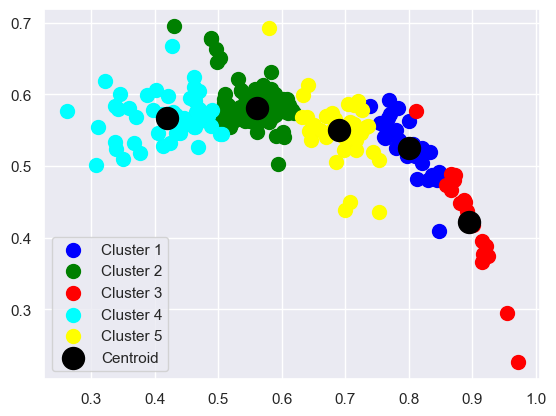

In [61]:
plt.scatter(X_test1.values[y_predict == 0, 0], X_test1.values[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X_test1.values[y_predict == 1, 0], X_test1.values[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X_test1.values[y_predict == 2, 0], X_test1.values[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X_test1.values[y_predict == 3, 0], X_test1.values[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster 
plt.scatter(X_test1.values[y_predict == 4, 0], X_test1.values[y_predict == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5') #for fourth cluster 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'black', label = 'Centroid') 
plt.grid(True)
plt.legend() 
plt.show()

In [62]:
from scipy.spatial.distance import cdist

In [63]:
def plot_kmeans(kmeans, X, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    plt.figure()
    ax = plt.gca()
    ax.axis('equal')
    ax.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
    ax.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
    ax.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
    ax.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster 
    ax.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5') #for fifth cluster 
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c = 'black' , s = 100 , cmap='viridis', zorder=2) 
    ax.grid(True)
    
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c,r, fc='#CCCCCC',lw=3, alpha=0.5, zorder=1))

NameError: name 'rng' is not defined

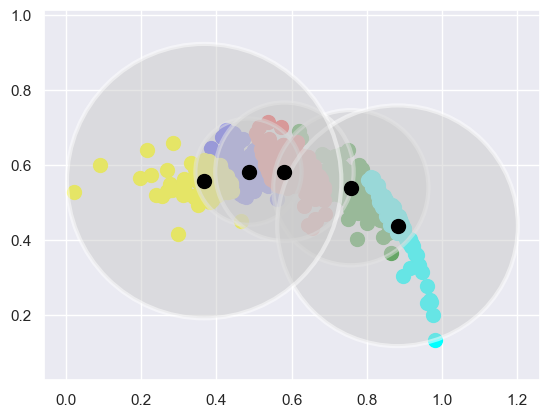

In [64]:
plot_kmeans(KMeans(n_clusters=5, random_state=42), X_train1.values)
plot_kmeans(KMeans(n_clusters=5, random_state=42), np.dot(X_train1.values, rng.randn(3, 3)))

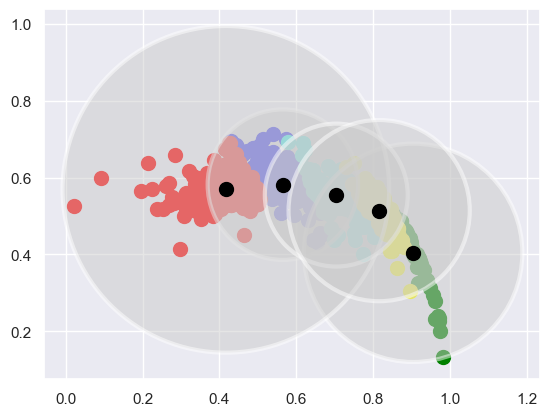

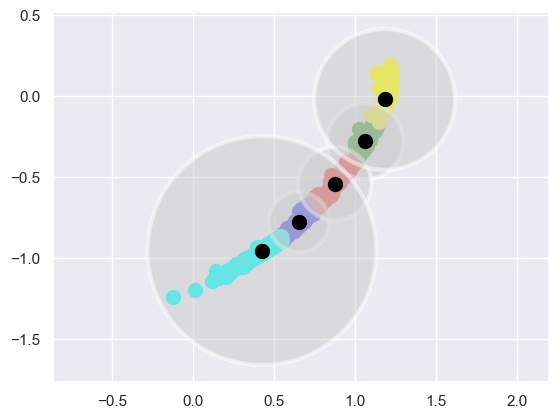

In [65]:
rng = np.random.RandomState(13)
X_stretched = np.dot(df.values, rng.randn(3, 3))

plot_kmeans(KMeans(n_clusters=5, random_state=42), df.values)
plot_kmeans(KMeans(n_clusters=5, random_state=42), np.dot(X_stretched, rng.randn(3, 3)))

In [66]:
from sklearn import mixture

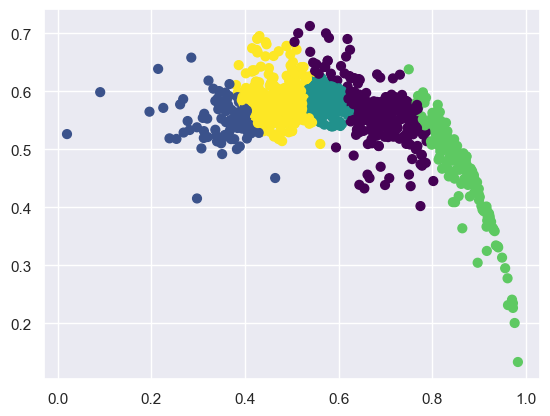

In [67]:
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(df)
labels = gmm.predict(df)
plt.scatter(df.values[:, 0], df.values[:, 1], c=labels, s=40, cmap='viridis') 
plt.grid(True)

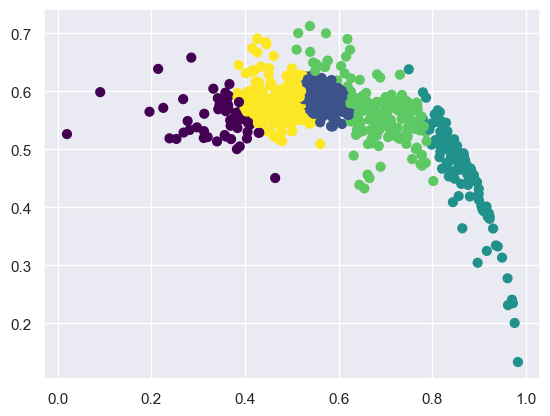

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.values, y, test_size=0.3, random_state=42)

gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X_train2)
labels = gmm.predict(X_train2)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels, s=40, cmap='viridis') 
plt.grid(True)

In [69]:
probs = gmm.predict_proba(df)
print(probs[:1500].round(2))

[[0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.  ]
 [0.   0.99 0.   0.01 0.  ]
 ...
 [0.   0.   1.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]]


c:\Users\shiva\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


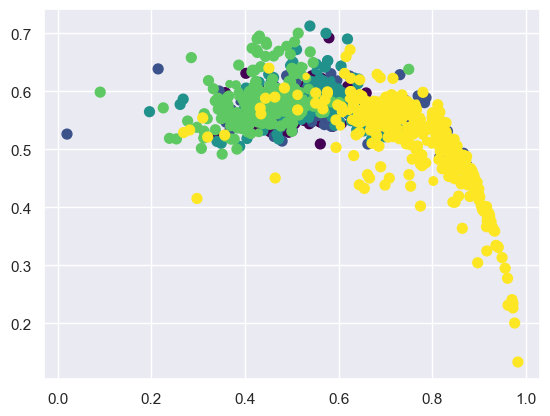

In [73]:
size = 50*probs.max(1)**2
plt.scatter(df.values[:, 0], df.values[:, 1], c=y_new , s=size, cmap='viridis') 
plt.grid(True)

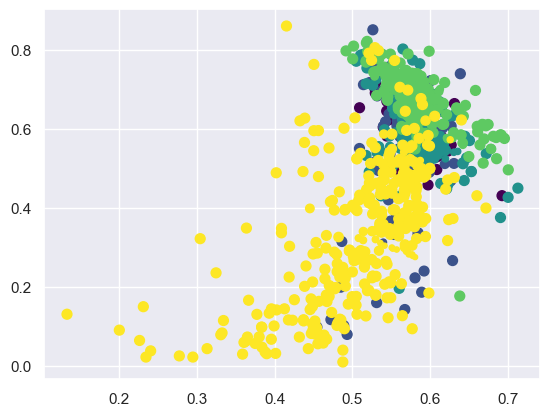

In [74]:
plt.scatter(df.values[:, 1], df.values[:, 2], c=y_new , s=size, cmap='viridis') 

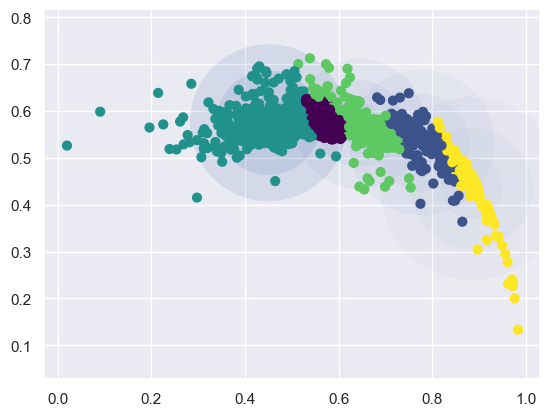

In [75]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = plt.gca()
    if covariance.shape == (2, 2):
        U,s,Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width = 2 * np.sqrt(s)
        height = 2 * np.sqrt(s)
    else: 
        angle = 0
        width = 2 * np.sqrt(covariance)
        height = 2 * np.sqrt(covariance)

        for nsig in range(1, 4):
          ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels , s=40 , cmap='viridis', zorder=2) 
        ax.grid(True)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40 , zorder=2) 
    ax.axis('equal')

    w_factor = 0.2/gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

plot_gmm(mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state=42), df.values)

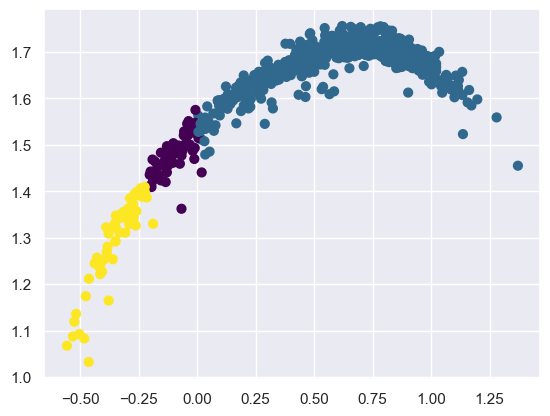

In [76]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(df.values)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels , s=40 , cmap='viridis') 
plt.grid(True)

In [77]:
probs = gmm.predict_proba(X_stretched)
print(probs[:20000].round(2))

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


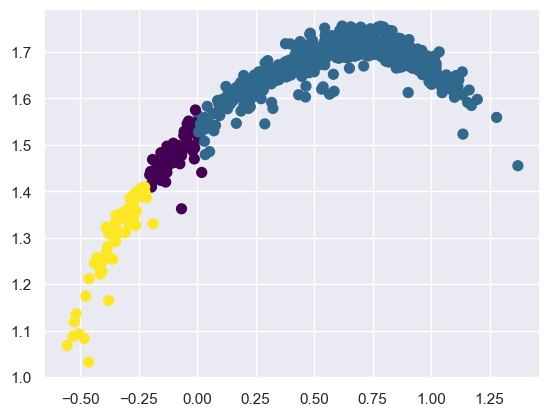

In [78]:
size = 50*probs.max(1)**2
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels , s=size, cmap='viridis') 
plt.grid(True)

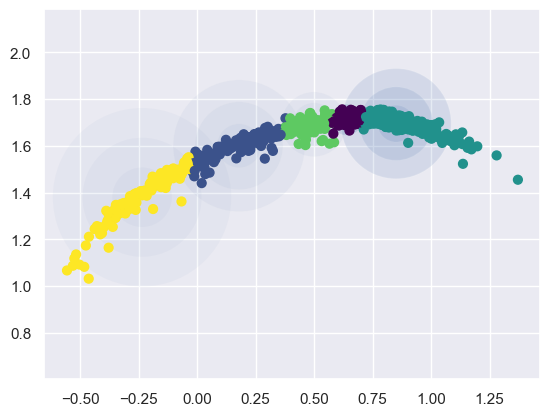

In [80]:
plot_gmm(mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state=42), X_stretched)

**GMM as Density Estimation**

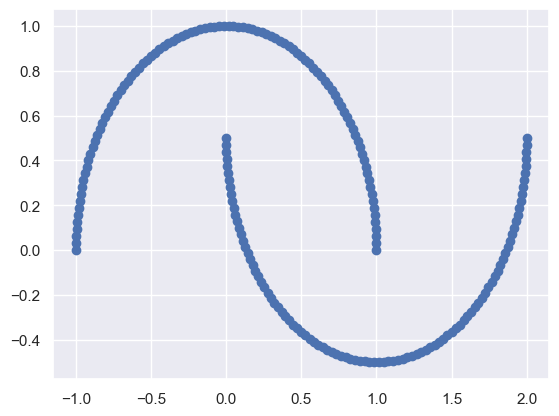

In [82]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(200, noise=0, random_state=42)
plt.scatter(Xmoon[:,0], Xmoon[:,1])
plt.grid(True)

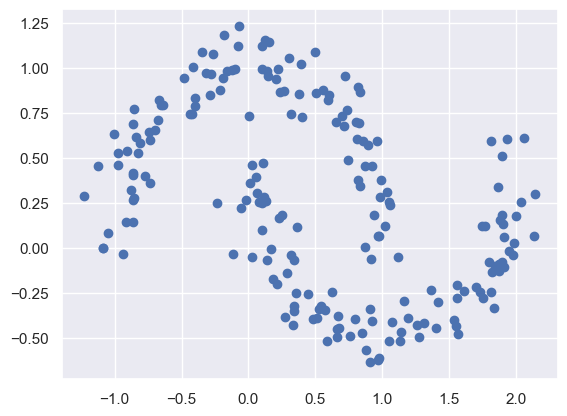

In [83]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(200, noise=0.1, random_state=42)
plt.scatter(Xmoon[:,0], Xmoon[:,1])
plt.grid(True)

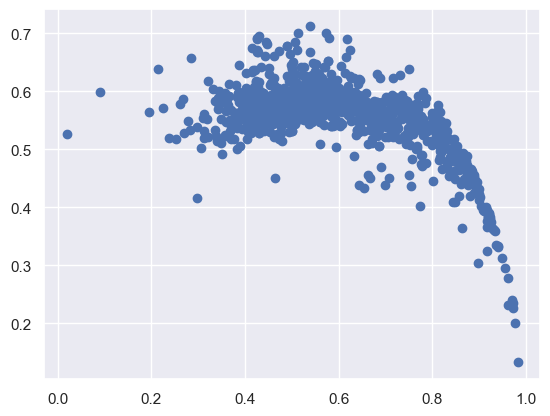

In [84]:
plt.scatter(df.values[:, 0], df.values[:, 1])

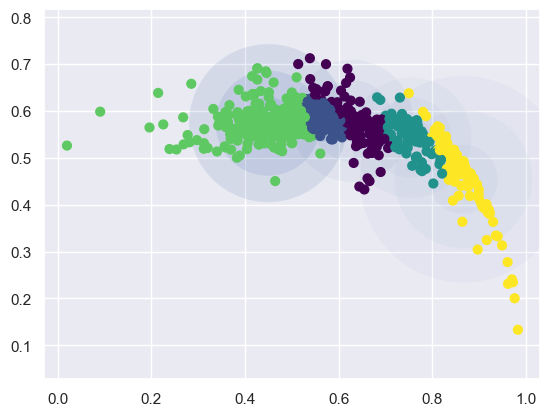

In [86]:
plot_gmm(mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state=42), X_train2)

c:\Users\shiva\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


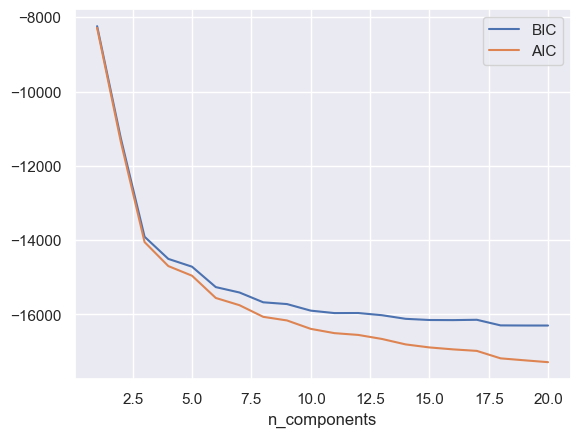

In [88]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=42).fit(X_train2)
          for n in n_components]

plt.plot(n_components, [m.bic(X_train2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_train2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Accuracy plot

**Prepare Accuracy Data**

In [ ]:
accuracy = {
    "lgr\nnewtoncg": lgr_newton.score(test_x, test_y), 
    "lgr\nlbfgs": lgr_lbfgs.score(test_x, test_y), 
    "lgr\nliblinear": lgr_liblinear.score(test_x, test_y), 
    "lgr\nsag": lgr_sag.score(test_x, test_y), 
    "lgr\nsaga": lgr_saga.score(test_x, test_y), 
    "dtc": dtc.score(test_x, test_y), 
    "rfc": rfc.score(test_x, test_y),
    "svc\nlinear": svc_linear.score(test_x, test_y),
    "svc\npoly": svc_poly.score(test_x, test_y),
    "svc\nrbf": svc_rbf.score(test_x, test_y),
    "svc\nsigmoid": svc_sigmoid.score(test_x, test_y),
    "nb": nb.score(test_x, test_y),
    "knn": knn.score(test_x, test_y),
    "kmean": accuracy_score(kmean.predict(test_x), test_y),
    "mlp": mlp.score(test_x, test_y),
    }
x_axis = list(accuracy.keys())
y_axis = list(accuracy.values())

**Comparing accuracy**

In [ ]:
plt.figure(figsize = (15, 5))
plt.bar(x_axis, y_axis)
plt.xlabel("\nML Model")
plt.ylabel("\nAccuracy\n")
plt.title("\nComparing accuracy\n")
plt.ylim(0, 1)
plt.show()